## **Dataset**: Adult Census Income

### **Description**

The Adult Dataset, extracted from the 1994 US Census, provides a unique opportunity to explore the relationships between demographic and socioeconomic factors and individual income levels.

The primary objective of this project is to develop a predictive model that accurately classifies individuals into two income categories: above or
below $50,000 per year.


### **Pipeline**

*   Data Collection
*   EDA (Exploratory Data Analysis)
*   Data Preprocessing
*   Model Selection
*   Model Training
*   Model Evaluation
*   Data Postprocessing




## **Data Collection**

The dataset will be imported into the code/notebook from the UCI Repository


*   Firstly install ucimlrepo package


In [ ]:
pip install ucimlrepo

*   Set up the Environment

In [ ]:
# Import the necessary libraries
from ucimlrepo import fetch_ucirepo #Import the dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import time
from tensorflow.keras.optimizers import Adam

*   Fetch the dataset and load it as a Pandas Dataframe

In [ ]:
# fetch dataset
adult_dataset = fetch_ucirepo(id=2)

# Assuming 'adult.data.features' contains the features and 'adult.data.targest' contains the labels
adult = pd.DataFrame(adult_dataset.data.features )
adult['income'] = adult_dataset.data.targets  # add the target column

adult #print the dataframe

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  income  
0      United-States   <=50K  
1      United-States   <=50K  
2      United-States   <=50K  
3      United-States   <=50K  
4               Cuba   <=50K  
...              ...     ...  
48837  United-States  <=50K.  
48838  United-States  <=50K.  
48839  United-States  <=50K.  
48840  United-States  <=50K.  
48841  United-States   >50K.  

[48842 rows x 15 columns]

## **EDA**

Exploratory Data Analysis



*   Number of rows (instances) in the dataset
*   Number of columns in the dataset
*   Number of features in the dataset



In [ ]:
num_rows, num_columns = adult.shape # Find the number dimensions of the dataset

print(f"This dataset has got {num_rows} rows")
print(f"This dataset has got {num_columns} columns")
print()
print(f"This dataset has got {num_columns-1} features")

This dataset has got 48842 rows
This dataset has got 15 columns

This dataset has got 14 features




*   First 5 rows of the dataset
*   Last 5 rows of the dataset





In [ ]:
print("First 5 rows of the dataset \n")
adult.head()

First 5 rows of the dataset 



age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
print("Last 5 rows of the dataset \n")
adult.tail()

Last 5 rows of the dataset 



age     workclass  fnlwgt  education  education-num  \
48837   39       Private  215419  Bachelors             13   
48838   64           NaN  321403    HS-grad              9   
48839   38       Private  374983  Bachelors             13   
48840   44       Private   83891  Bachelors             13   
48841   35  Self-emp-inc  182148  Bachelors             13   

           marital-status       occupation    relationship  \
48837            Divorced   Prof-specialty   Not-in-family   
48838             Widowed              NaN  Other-relative   
48839  Married-civ-spouse   Prof-specialty         Husband   
48840            Divorced     Adm-clerical       Own-child   
48841  Married-civ-spouse  Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  income  
48837  United-States  <=50K.  
48838  United-States  <=50K.  
48839  United-States  <=50K.  
48840  United-States  <=50K.  
48841  United-States   >50K.

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Using the **".info()"** method we get a general overview of the dataset

Insights from this method:


*   Number of Entries - 48842
*   Number of Columns - 15
*   Column names
*   Column types
*   Non-null entries for each column

As we can see in columns such as: **workclass, occupation, native country**

The number of non-null entries is smaller than the overall entries of the dataset, implying that in this data set we have got ***NaN or Null values***







In [ ]:
adult.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Using the **".describe()"** method we get statistical information on the numerical attributes of the dataset:

Insights from this method:


*   Count - Number of entries this attribute is non-null
*   Range of values - min-max
*   Min, std, and quartiles


As we can see in these columns/attributes there are no null entries.

We can also see the scale and the variaty for each attribute which is essential on deciding the normalization techniques that will be used in this dataset for these attributes.

More techniques including visualization are going to be used to better see the distribution of features and their correlation with each-other.



*   Up to now it is already established that there are null values in the dataset.

Now we are going to use some more specific techniques in order to check again for Null or NaN values, how many for each columns and how the total number of Null or NaN values.




In [ ]:
# Check for any NaN values in the DataFrame
print("If the ouput is true then we get the right assurance of null values in the dataset\n")

has_na = adult.isna().any().any()  # Returns True if there's at least one NaN in the DataFrame
print(has_na)

# Alternatively, using isnull()
has_null = adult.isnull().any().any()  # Same result as isna()
print(has_null)

print()

#Now we are going to count how many null values there are for each column

print("Null values for each column: \n")
# Count NaNs in each column
na_counts = adult.isna().sum()
print(na_counts)

#Counting how many null values there are in total

# Total number of NaNs in the DataFrame
total_na = adult.isna().sum().sum()
print(f"\nNull values in total: {total_na} \n")

If the ouput is true then we get the right assurance of null values in the dataset

True
True

Null values for each column: 

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Null values in total: 2203 



Here we got clearer proof of the dataset containing null values.

We learned how many null values there are in total and how many for each column but not how many entries have got null values.

Dealing with null values is part of the **Data Preprocessing** step, where further analysis is going to be made.

In [ ]:
#To find the unique values for each feature
adult.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

By checking how many unique values there are for each attrbute we get a sense of how diverse the attributes' values are and what to use later on when dealing with normalization during the **Data Preprocessing** step.


*   High-Cardinality in numerical attributes, indicating a wide range of data points.
*   Categorical diversity reflecting various categories for each feature.
*   Categories like "sex" are binary attributes only containing 2 different values, in this case: Male, Female.


*   **Problem** --> Income has got 4 unique values but it is supposed to have only 2 (50 or less ; more than 50)

We will get more specifc info on what is going on with this attribute and will deal with fixing it later on the **Data Preprocessing** step.



In [ ]:
# counts the occurrences of each unique value in the income column of your dataset, showing how many individuals earn less than or equal to $50,000 per yearand how many earn more than $50,000 per year.
adult['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

From this we gathered that some typo is what is causing the problem with the unique values on the income column (target feature)

Furthermore we are also going to see the unique values for each attribute to gather more information on values who are more present.

In [ ]:
adult_features = adult.columns.tolist()

for feature in adult_features:
    print("\n\n")
    # Print the output of value_counts()
    print(adult[feature].value_counts())
    print()





age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64




workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64




fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64




education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83

By checking the unqiue values for each attribute/column, these insights were gathered:


*   High-Cardinality for each attribute so need to be dealt with carefully during the normalization process.
*   "?" indicates missing or unknown values, so even though we found NaN or Null values earlier, turns out there are still more missing values that need to be dealt with in this dataset.
*   Education and Educational-num represent the same thing, but one does it in categorical values and one in numerical.




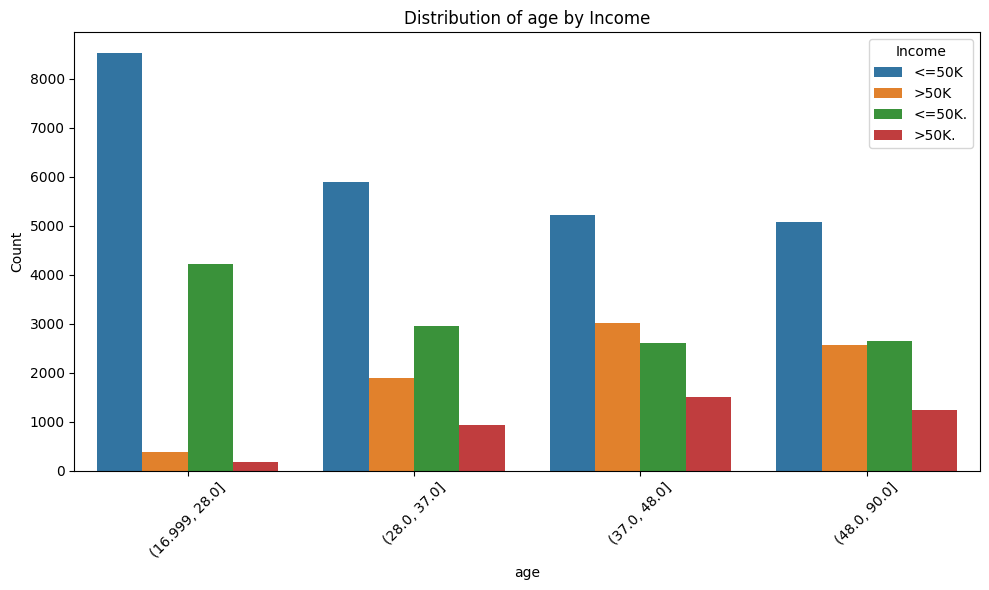

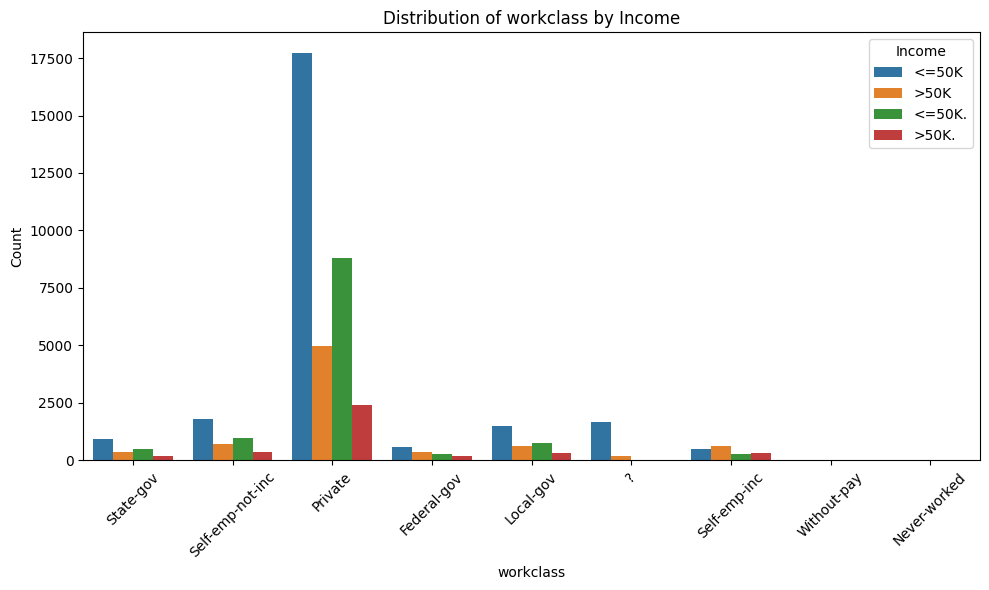

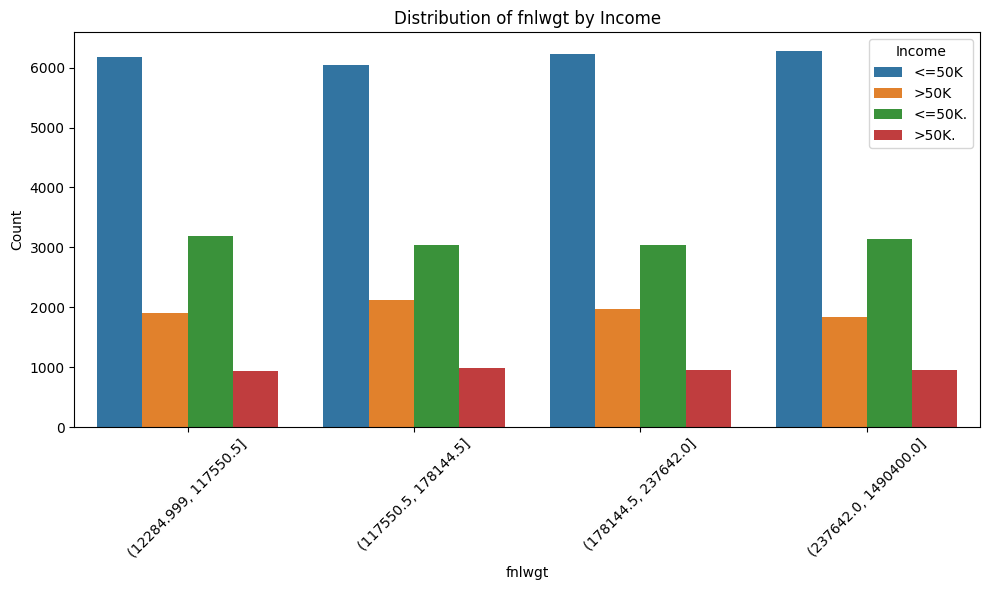

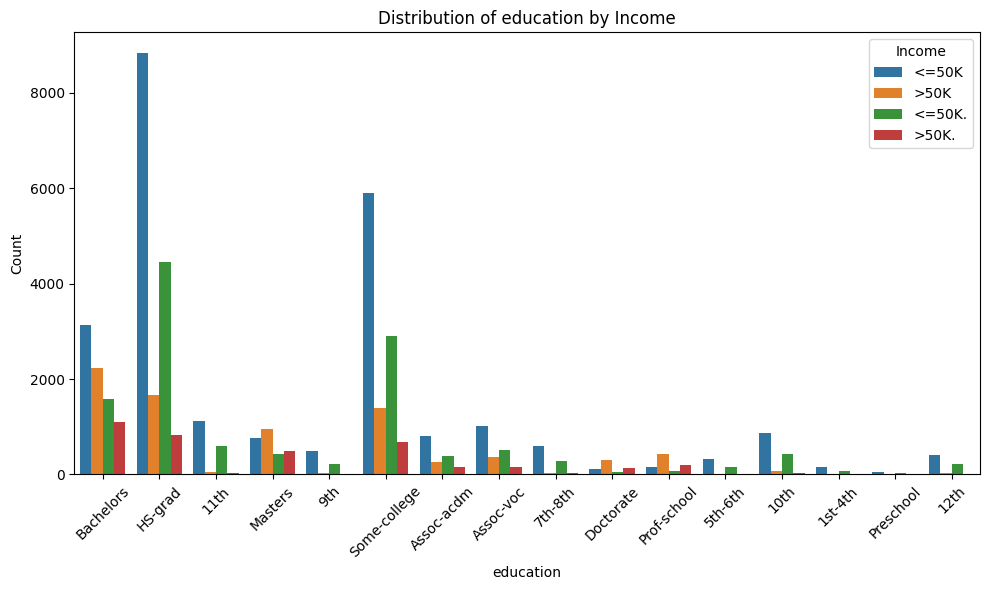

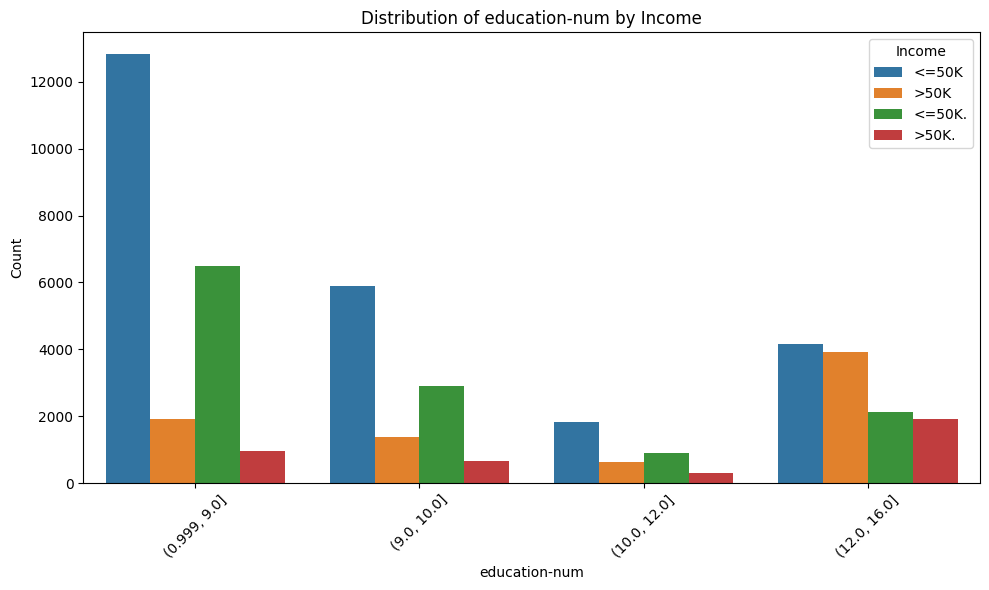

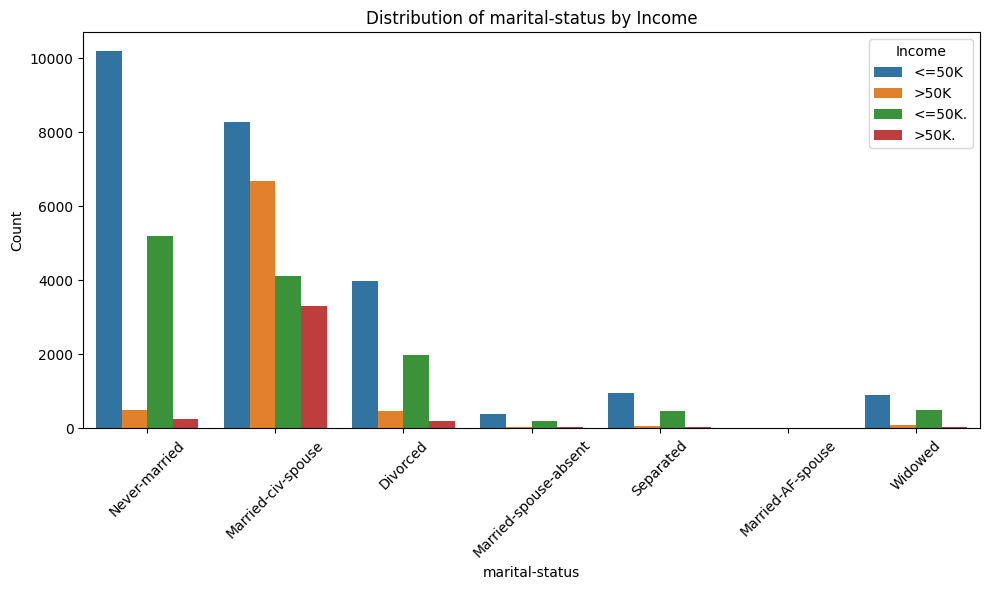

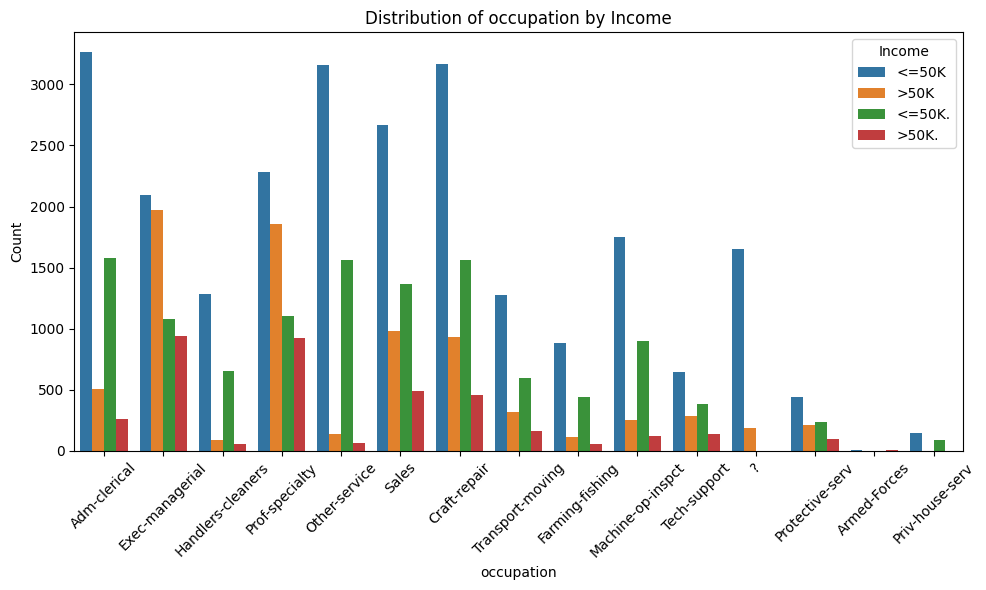

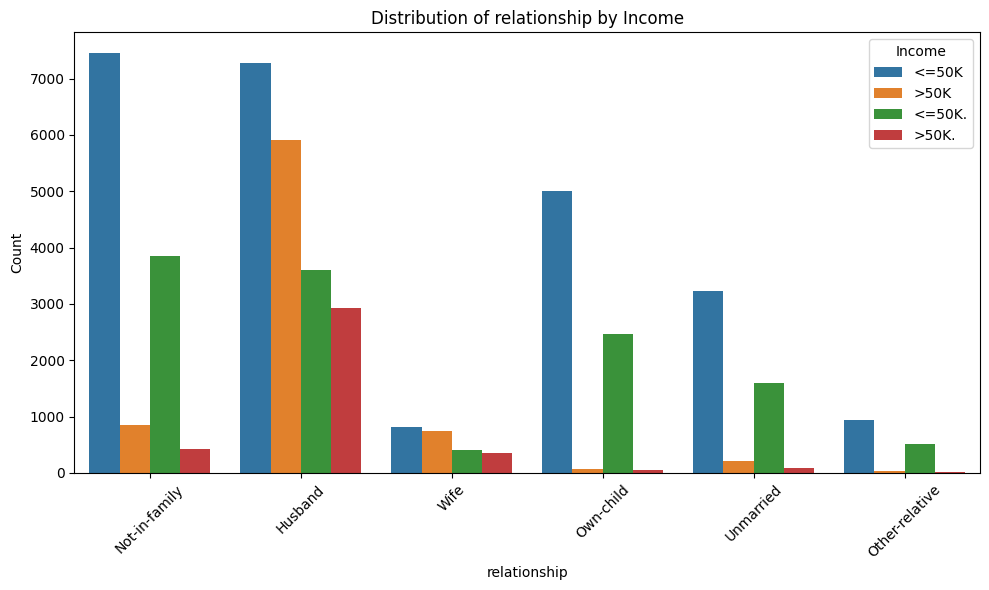

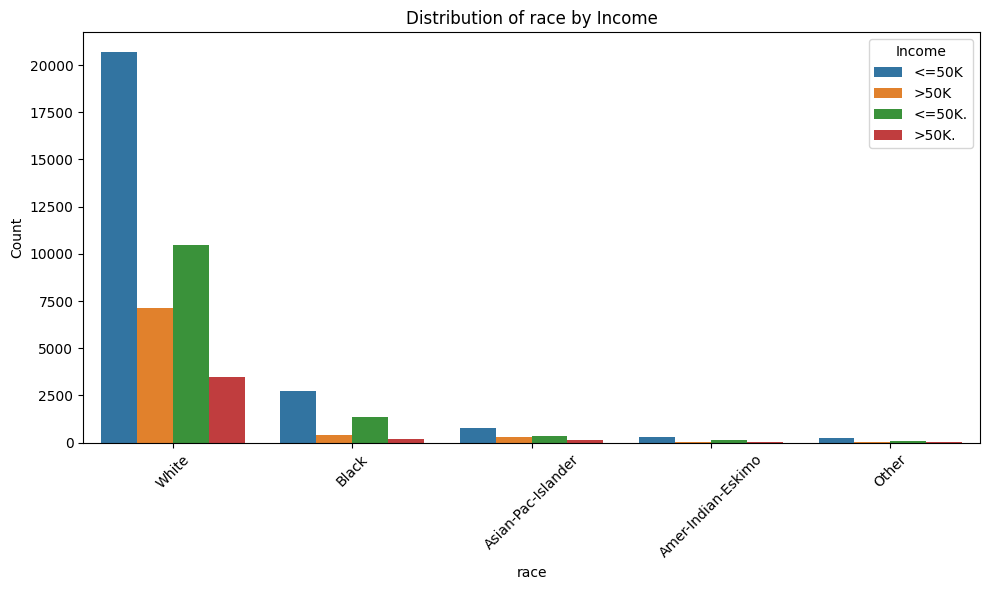

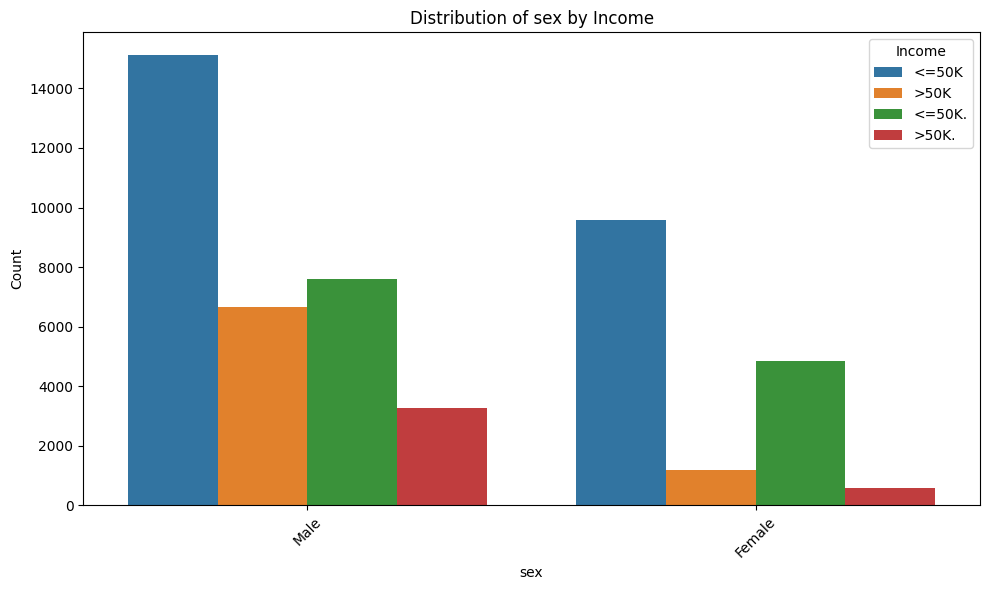

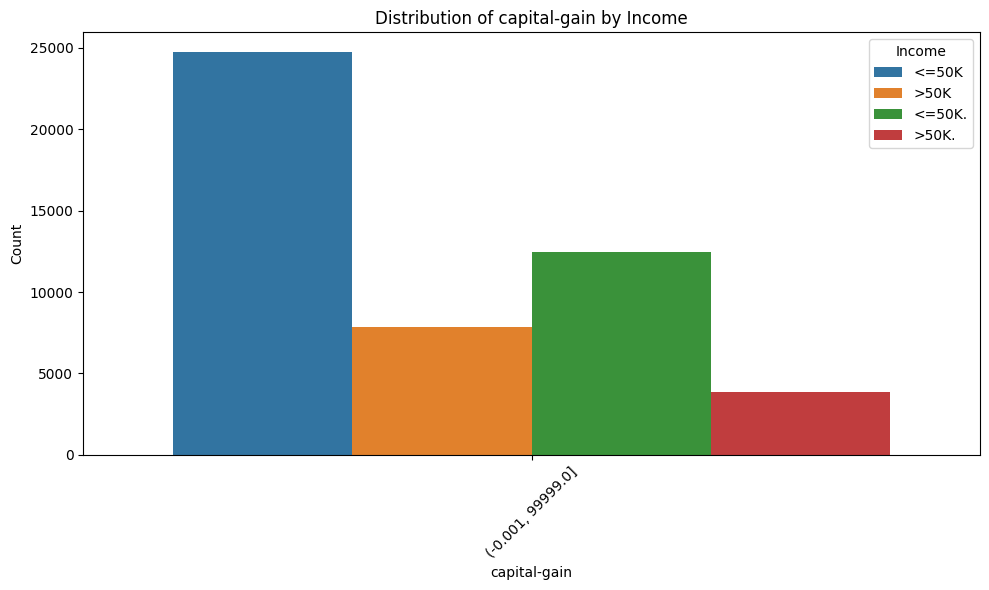

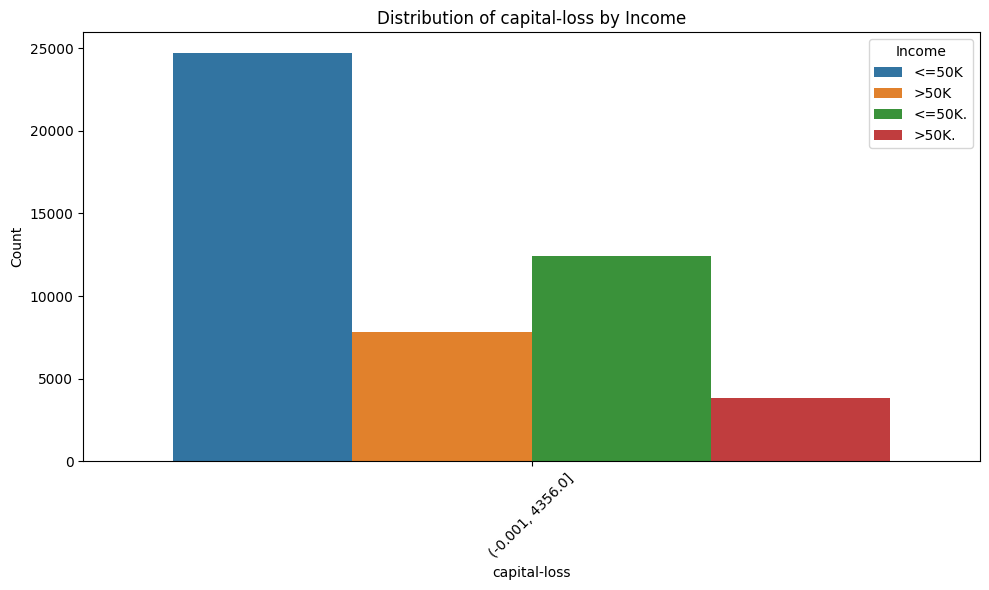

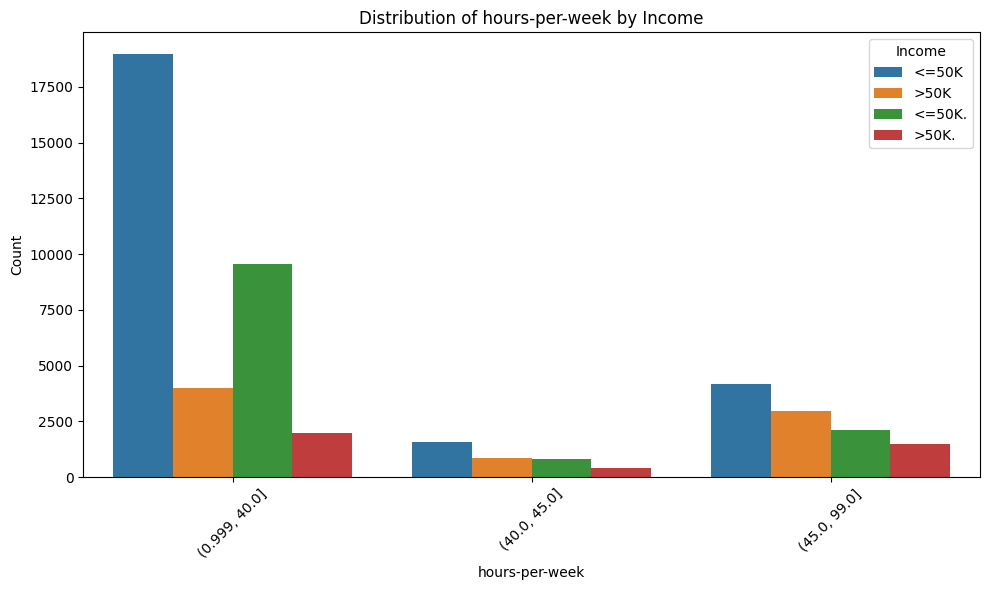

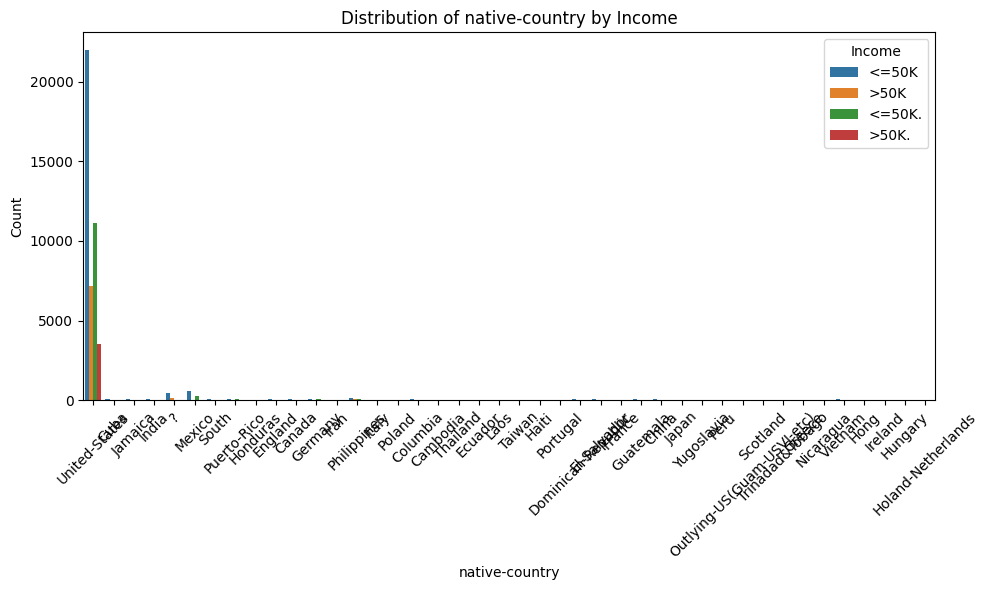

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Creating a copy of the original dataset to use for the visualization purposes and not mess with the original one
eda_adult = adult.copy()

# Convert numerical columns to categorical bins
numerical_columns = eda_adult.select_dtypes(include=[np.number]).columns.tolist()
for column in numerical_columns:
    eda_adult[column] = pd.qcut(eda_adult[column], 4, duplicates='drop')  # Create quartile bins

# List of all features excluding the income
features = eda_adult.columns.tolist()
features.remove('income')

# Plotting
for feature in features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, hue='income', data=eda_adult)
    plt.title(f'Distribution of {feature} by Income')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Income', loc='upper right')
    plt.tight_layout()
    plt.show()

    print("\n\n")


With these graphs we clearly can tell what features are more important in order to gain or not 50K a year and what features are dominant.


*   There should have been two bars in two different colors for each graph representing the binary nature of income but because of the typo it is not.
Although this problem is going to be fixed in the Data Preprocessing step

Some Insights:

*   Ages between 37-48 gain more money.
*   People whose workclass is "private" clearly have got a bigger income.
*   In the 1990s people owning a bachelor degree predominantly more.
*   Married-civ-spouse category has got the biggest count of people earning more than 50K.
*   The occupation graph proves what was already known that higher occupational positions make it possible to earn a higher income.
*   Husbands have got a well-defined difference in earning more than the other types of relationships.
*   White people seem to earn way more than any other race during that time in the US.
*   Age gap is really big by clearly showing that the majority of males earn more women.
*   The most obvious distribution is the one that shows that there are more people who are USA natives and therefore more USA Natives earning more than 50K.






## **Data Preprocessing**



*   Firstly let's fix the typo at the target column.



In [ ]:
# Replace multiple values in the "income" column
adult['income'] = adult['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

#Now let's view the unique values in the "income" column again
print( adult["income"].value_counts(), "\n")

#Viewing again the unique values for each attribute
print( adult.nunique() )

income
<=50K    37155
>50K     11687
Name: count, dtype: int64 

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                2
dtype: int64



Now the typo at the income column is fixed and the 4 unique values are aggregated into 2.

This is seen specifically at the income columnn but also when viewing unique values of each column of the whole dataset.






*   Removing Null, NaN and "?" values.


In [ ]:
#Replacing Null or "?" values with NaN
adult = adult.replace({'null': pd.NA, 'Null': pd.NA, "?": pd.NA}) #Replacing every possible not neccessary value with NaN

#Rechecking how many NaN values we have

# Count NaN values per column
nan_count_per_column = adult.isna().sum()
print("NaN count per column:\n")
print(nan_count_per_column)

# Count total NaN values across the DataFrame
total_nan_count = adult.isna().sum().sum()
print("\nTotal NaN count across the DataFrame:", total_nan_count)

# Remove rows that contain any NaN values
adult_cleaned = adult.dropna()

# Recheck for Null, NaN or "?" values to ensure they are all handled
# Check for any remaining 'null', 'Null', or '?'
verification_check = adult_cleaned.isin(['null', 'Null', '?']).sum().sum()
print("\nVerification check for 'null', 'Null', and '?' in the cleaned DataFrame:", verification_check)

# Additionally, you can check for NaN again to ensure there are no NaN values left after cleanup
nan_check_post_cleanup = adult_cleaned.isna().sum().sum()
print("\nCheck for NaN values in the cleaned DataFrame:", nan_check_post_cleanup)

print("\nDataFrame after removing rows with NaN values:\n")
adult_cleaned


NaN count per column:

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Total NaN count across the DataFrame: 6465

Verification check for 'null', 'Null', and '?' in the cleaned DataFrame: 0

Check for NaN values in the cleaned DataFrame: 0

DataFrame after removing rows with NaN values:



age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48836   33           Private  245211  Bachelors             13   
48837   39           Private  215419  Bachelors             13   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
...                   ...                ...            ...   
48836       Never-married     Prof-specialty      Own-child   
48837            Divorced     Prof-specialty  Not-in-family   
48839  Married-civ-spouse     Prof-specialty        Husband   
48840            Divorced       Adm-clerical      Own-child   
48841  Married-civ-spouse    Exec-managerial        Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48836               White    Male             0             0              40   
48837               White  Female             0             0              36   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country income  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States  <=50K  
3      United-States  <=50K  
4               Cuba  <=50K  
...              ...    ...  
48836  United-States  <=50K  
48837  United-States  <=50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K  

[45222 rows x 15 columns]

After replacing 'Null', 'null', and '?' with pd.NA, we noticed that the number of NaN values in the dataframe increased. This change means we successfully updated those placeholders to a format that Pandas recognizes as missing values.

Next, we removed all rows that contained any of these NaN values. This step reduced the total number of rows in the dataframe from 48,842 to 45,222.

Although we lost some data in this process, the amount was relatively small compared to the entire dataset. Given the importance of working with clean and accurate data, this small loss is considered manageable and worth it for the sake of better data quality.






*   Feature Engineering - dropping "unnecessary" columns


In [ ]:
# Drop the 'Native Country' column and modify the DataFrame in place
adult_cleaned.drop('native-country', axis=1, inplace=True)

# Drop the 'Education' column and modify the DataFrame in place
adult_cleaned.drop('education', axis=1, inplace=True)

#Viewing the dataset after the changes
adult_cleaned

<ipython-input-18-62a823b6c323>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_cleaned.drop('native-country', axis=1, inplace=True)
<ipython-input-18-62a823b6c323>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_cleaned.drop('education', axis=1, inplace=True)


age         workclass  fnlwgt  education-num      marital-status  \
0       39         State-gov   77516             13       Never-married   
1       50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2       38           Private  215646              9            Divorced   
3       53           Private  234721              7  Married-civ-spouse   
4       28           Private  338409             13  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
48836   33           Private  245211             13       Never-married   
48837   39           Private  215419             13            Divorced   
48839   38           Private  374983             13  Married-civ-spouse   
48840   44           Private   83891             13            Divorced   
48841   35      Self-emp-inc  182148             13  Married-civ-spouse   

              occupation   relationship                race     sex  \
0           Adm-clerical  Not-in-family               White    Male   
1        Exec-managerial        Husband               White    Male   
2      Handlers-cleaners  Not-in-family               White    Male   
3      Handlers-cleaners        Husband               Black    Male   
4         Prof-specialty           Wife               Black  Female   
...                  ...            ...                 ...     ...   
48836     Prof-specialty      Own-child               White    Male   
48837     Prof-specialty  Not-in-family               White  Female   
48839     Prof-specialty        Husband               White    Male   
48840       Adm-clerical      Own-child  Asian-Pac-Islander    Male   
48841    Exec-managerial        Husband               White    Male   

       capital-gain  capital-loss  hours-per-week income  
0              2174             0              40  <=50K  
1                 0             0              13  <=50K  
2                 0             0              40  <=50K  
3                 0             0              40  <=50K  
4                 0             0              40  <=50K  
...             ...           ...             ...    ...  
48836             0             0              40  <=50K  
48837             0             0              36  <=50K  
48839             0             0              50  <=50K  
48840          5455             0              40  <=50K  
48841             0             0              60   >50K  

[45222 rows x 13 columns]

Now there are 13 features (including the target) in the dataset instead of the initial 15 features

Native-Country: We dropped this column because if everyone in the dataset works in the US, their native country is less relevant to our analysis. Since all individuals are subject to US laws and pay US taxes, this factor doesn't significantly influence their income levels.

Education: We removed this feature because it duplicates the information provided by the "education-num" feature. While "Education" offers categorical data, "education-num" presents it in numerical form, which is more straightforward for normalization and analysis.



*   Transforming the binary valued attributes into their binary representation - 0/1



In [ ]:
# Transforming the target variable values into binary representation
adult_cleaned = adult_cleaned.replace({'>50K': 1, '<=50K': 0})

#Now let's view the unique values in the "income" column again
print( adult_cleaned["income"].value_counts(), "\n")

#Viewing the whole dataset
adult_cleaned

income
0    34014
1    11208
Name: count, dtype: int64 



<ipython-input-19-f08a2bd70726>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_cleaned = adult_cleaned.replace({'>50K': 1, '<=50K': 0})


age         workclass  fnlwgt  education-num      marital-status  \
0       39         State-gov   77516             13       Never-married   
1       50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2       38           Private  215646              9            Divorced   
3       53           Private  234721              7  Married-civ-spouse   
4       28           Private  338409             13  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
48836   33           Private  245211             13       Never-married   
48837   39           Private  215419             13            Divorced   
48839   38           Private  374983             13  Married-civ-spouse   
48840   44           Private   83891             13            Divorced   
48841   35      Self-emp-inc  182148             13  Married-civ-spouse   

              occupation   relationship                race     sex  \
0           Adm-clerical  Not-in-family               White    Male   
1        Exec-managerial        Husband               White    Male   
2      Handlers-cleaners  Not-in-family               White    Male   
3      Handlers-cleaners        Husband               Black    Male   
4         Prof-specialty           Wife               Black  Female   
...                  ...            ...                 ...     ...   
48836     Prof-specialty      Own-child               White    Male   
48837     Prof-specialty  Not-in-family               White  Female   
48839     Prof-specialty        Husband               White    Male   
48840       Adm-clerical      Own-child  Asian-Pac-Islander    Male   
48841    Exec-managerial        Husband               White    Male   

       capital-gain  capital-loss  hours-per-week  income  
0              2174             0              40       0  
1                 0             0              13       0  
2                 0             0              40       0  
3                 0             0              40       0  
4                 0             0              40       0  
...             ...           ...             ...     ...  
48836             0             0              40       0  
48837             0             0              36       0  
48839             0             0              50       0  
48840          5455             0              40       0  
48841             0             0              60       1  

[45222 rows x 13 columns]



*   Normalization



1.   One-Hot Encoding - Categorical Features
2.   Standardization - All the features excluding the target feature (beneficial for numerical valued features)






In [ ]:

# Identifying categorical columns
categorical_cols = ["workclass", "marital-status", "occupation", "relationship", "race", "sex"]

# One-Hot Encoding for Categorical Data
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(adult_cleaned[categorical_cols])

# Create DataFrame from the encoded features, with appropriate column names
data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical data with the rest of the dataset (excluding original categorical columns)
adult_numerical = adult_cleaned.drop(categorical_cols, axis=1).reset_index(drop=True)
data_encoded_df = data_encoded_df.reset_index(drop=True)
adult_combined = pd.concat([adult_numerical, data_encoded_df], axis=1)

# Seperating the dataset into features and target to further normalize
adult_target = adult_combined["income"]
adult_features = adult_combined.drop('income', axis=1)

# Apply Standard Scaler to the entire set of features
scaler = StandardScaler()
adult_normalized = scaler.fit_transform(adult_features)
adult_normalized = pd.DataFrame(adult_normalized, columns=adult_features.columns)  # Convert back to DataFrame

# Show the final normalized version of all the features
adult_normalized

age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.034201 -1.062295       1.128753      0.142888      -0.21878   
1      0.866417 -1.007438       1.128753     -0.146733      -0.21878   
2     -0.041455  0.245284      -0.438122     -0.146733      -0.21878   
3      1.093385  0.425853      -1.221559     -0.146733      -0.21878   
4     -0.798015  1.407393       1.128753     -0.146733      -0.21878   
...         ...       ...            ...           ...           ...   
45217 -0.419735  0.525154       1.128753     -0.146733      -0.21878   
45218  0.034201  0.243135       1.128753     -0.146733      -0.21878   
45219 -0.041455  1.753613       1.128753     -0.146733      -0.21878   
45220  0.412481 -1.001947       1.128753      0.579985      -0.21878   
45221 -0.268423 -0.071818       1.128753     -0.146733      -0.21878   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0           -0.078120              -0.179133            -0.271285   
1           -2.326738              -0.179133            -0.271285   
2           -0.078120              -0.179133            -0.271285   
3           -0.078120              -0.179133            -0.271285   
4           -0.078120              -0.179133            -0.271285   
...               ...                    ...                  ...   
45217       -0.078120              -0.179133            -0.271285   
45218       -0.411249              -0.179133            -0.271285   
45219        0.754701              -0.179133            -0.271285   
45220       -0.078120              -0.179133            -0.271285   
45221        1.587523              -0.179133            -0.271285   

       workclass_Private  workclass_Self-emp-inc  ...  relationship_Own-child  \
0              -1.671940               -0.194353  ...               -0.414338   
1              -1.671940               -0.194353  ...               -0.414338   
2               0.598108               -0.194353  ...               -0.414338   
3               0.598108               -0.194353  ...               -0.414338   
4               0.598108               -0.194353  ...               -0.414338   
...                  ...                     ...  ...                     ...   
45217           0.598108               -0.194353  ...                2.413490   
45218           0.598108               -0.194353  ...               -0.414338   
45219           0.598108               -0.194353  ...               -0.414338   
45220           0.598108               -0.194353  ...                2.413490   
45221          -1.671940                5.145277  ...               -0.414338   

       relationship_Unmarried  relationship_Wife  race_Amer-Indian-Eskimo  \
0                   -0.344115          -0.220182                -0.098553   
1                   -0.344115          -0.220182                -0.098553   
2                   -0.344115          -0.220182                -0.098553   
3                   -0.344115          -0.220182                -0.098553   
4                   -0.344115           4.541693                -0.098553   
...                       ...                ...                      ...   
45217               -0.344115          -0.220182                -0.098553   
45218               -0.344115          -0.220182                -0.098553   
45219               -0.344115          -0.220182                -0.098553   
45220               -0.344115          -0.220182                -0.098553   
45221               -0.344115          -0.220182                -0.098553   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
0                    -0.172245   -0.321150   -0.088698    0.403026   
1                    -0.172245   -0.321150   -0.088698    0.403026   
2                    -0.172245   -0.321150   -0.088698    0.403026   
3                    -0.172245    3.113814   -0.088698   -2.481232   
4                    -0.172245    3.113814   -0.088698   -2.481232   


**Step 1:** Applying One-Hot Encoding to Categorical Features

***What It Does:*** One-Hot Encoding transforms each categorical value into a new binary column, making the data suitable for machine learning models which require numerical input.

***How It Affects the Dataset:*** It increases the number of features by creating new columns for each unique category, which helps prevent any misinterpretation of categorical data by the model.

**Step 2:** Separating the Dataset and Applying Standard Scaler

***What It Does:*** Standard Scaler normalizes the feature data, setting the mean to 0 and the standard deviation to 1 for each feature.

***How It Affects the Dataset:*** This normalization ensures all features contribute equally to model training, improves algorithm convergence, and enhances overall model performance.

These steps systematically prepare the dataset for effective machine learning model training, addressing both the need for numerical input and equal feature contribution.

As we can see from the complete normalized features dataset, the number of columns has gone up to 47 which is very computationally expensive and is prone to the curse of dimensionality but this will be adressed more in the next steps.

Also all the values are normalized so they are all centered around zero.


*   PCA

In this step we are going to find the optional number of principal components for the dataset and then apply PCA to get the dimensionality reducted dataset.


Covariance Matrix: [[ 1.00002211 -0.07579365  0.03762378 ...  0.0266048  -0.08205516
   0.08205516]
 [-0.07579365  1.00002211 -0.04199395 ... -0.06527507 -0.02724049
   0.02724049]
 [ 0.03762378 -0.04199395  1.00002211 ...  0.05155643 -0.00341735
   0.00341735]
 ...
 [ 0.0266048  -0.06527507  0.05155643 ...  1.00002211 -0.10331043
   0.10331043]
 [-0.08205516 -0.02724049 -0.00341735 ... -0.10331043  1.00002211
  -1.00002211]
 [ 0.08205516  0.02724049  0.00341735 ...  0.10331043 -1.00002211
   1.00002211]]
            


eigenvalues Matrix:
 [ 4.47823848e+00  2.55770402e+00  2.04785082e+00  1.90005545e+00
  2.03093847e-02  1.71341910e+00  1.57264060e+00  4.25511221e-01
  4.59204217e-01  5.48610996e-01  1.38032890e+00  6.26663521e-01
  6.86786657e-01  7.39216310e-01  1.25914322e+00  1.24232896e+00
  8.00040513e-01  1.19299782e+00  1.15442168e+00  8.61715197e-01
  8.77181777e-01  1.13626638e+00  1.12748891e+00  9.07160296e-01
  9.11050274e-01  1.10716729e+00  1.09652324e+00  9.47570884e-0

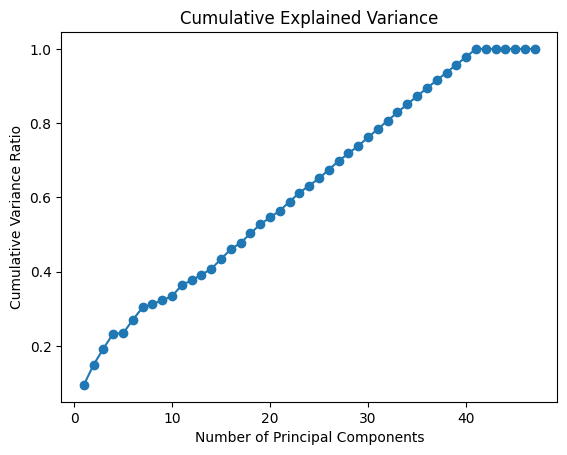

Number of components explaining 95% of the variance: 39

Principal Components:
 [[-0.17922384  0.33154263 -0.13919102 ... -0.14518728  0.05881536
   0.66786659]
 [ 0.02017179 -0.06738504 -0.07973669 ... -0.04457419  0.04445014
   0.03027446]
 [-0.0627862   0.22052423  0.30865791 ... -0.02017411 -0.19454757
  -0.34683735]
 ...
 [-0.1112649  -0.04630134  0.48872926 ...  0.02084082 -0.00810206
   0.01931785]
 [ 0.34880718  0.27169318 -0.00566835 ... -0.02791635  0.43755989
  -0.07106109]
 [-0.34880718 -0.27169318  0.00566835 ...  0.02791635 -0.43755989
   0.07106109]]

Data before PCA: (45222, 47)
Example of 2 samples: [[ 0.03420095 -1.06229487  1.12875281  0.14288836 -0.21878026 -0.07812006
  -0.17913329 -0.27128536 -1.67194018 -0.19435299 -0.30270988  4.71576482
  -0.02155438 -0.4022097  -0.02661055 -0.93339668 -0.11116333  1.44838587
  -0.17946176 -0.17046716  2.67634375 -0.01759772 -0.39187191 -0.39051917
  -0.18394227 -0.21768656 -0.26512739 -0.34491836 -0.07181018 -0.39142124
  -0.1

In [ ]:
#Getting only the data from the normalized features dataframe
adult_data = adult_normalized.to_numpy()

# Calculate the covariance matrix
covariance_matrix = np.cov(adult_data, rowvar=False)
print("Covariance Matrix:", covariance_matrix)
print("            \n")

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\neigenvalues Matrix:\n", eigenvalues)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print("\neigenvectors_sorted Matrix:\n", eigenvectors_sorted)

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot the explained variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# Choose the number of components explaining, e.g., 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of the variance: {num_components}")
# Choose the number of principal components
selected_components = eigenvectors_sorted[:, :num_components]
print("\nPrincipal Components:\n", selected_components)

print("\nData before PCA:", adult_data.shape)
print("Example of 2 samples:", adult_data[:2, :])
print("             \n")
# Project the data onto the selected principal components
adult_data_pca = np.dot(adult_data, selected_components)
print("\nData after PCA:", adult_data_pca.shape)
print("Example of 2 samples:", adult_data_pca[:2, :])
print("             ")


After applying PCA, we determined that the optimal number of principal components for our dataset is 39. This reduces the feature set by 8 columns compared to the original dataset.

Next, we'll compare the performance of a base MLP model on both the original dataset and the PCA-reduced dataset. This comparison will help us understand which dataset allows the MLP to achieve higher accuracy. This step is crucial for deciding whether reducing the dataset's dimensionality through PCA improves our model's efficiency and effectiveness.

*   For our dataset comparison — PCA vs no PCA — we will use a base MLP model with the following specifications:


***Model Architecture:***


**Input Layer:** Adjusted to the number of features in each dataset.

**Hidden Layer:** One layer with 100 neurons, using the ReLU activation function.

**Output Layer:** A single neuron with a sigmoid activation function, designed for binary classification.

***Training Parameters:***

**Optimizer:** Adam, known for its efficient handling of large datasets and adaptive learning rate capabilities.

**Loss Function:** Binary crossentropy, which is ideal for binary classification tasks.

**Number of Epochs:** 100, to allow sufficient learning without excessive overfitting.

**Data Splitting:** 70% of the data for training and 30% for testing.

**Validation Size:** 10% of the training set, used during the training process to monitor and prevent overfitting.

**Early Stopping: patience=10** in early stopping is generally a moderate choice that provides a good trade-off between allowing training to continue in case of potential improvement and stopping training to conserve resources and prevent overfitting when it’s clear the model isn’t improving significantly anymore.

This structured approach will enable us to effectively compare the performance of the MLP on the original dataset against the PCA-reduced dataset, focusing on which configuration yields better accuracy and generalization.




In [ ]:
def dataset_training_comparison(dataset_features_data, dataset_target_data):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(100, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nTest Accuracy: {test_accuracy}\n")
    print(f"\nPrecision: {precision}\n")
    print(f"\nRecall: {recall}\n")
    print(f"\nF1 Score: {f1}\n\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"\nTotal time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

This function automates the process of training and evaluating a Multi-Layer Perceptron (MLP) model on a dataset, specifically designed to compare the impact of using PCA-reduced features versus the original features.

**Key steps include:**

**Data Splitting:** Divides the dataset into a 70-30 train-test split.

**Output:** Provides model accuracy and displays a confusion matrix for detailed performance analysis.

This function is essential for assessing whether PCA effectively enhances model performance by reducing feature dimensionality while retaining crucial information.


Data without PCA 

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8146 - loss: 0.3868 - val_accuracy: 0.8405 - val_loss: 0.3220
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8496 - loss: 0.3229 - val_accuracy: 0.8468 - val_loss: 0.3169
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8555 - loss: 0.3139 - val_accuracy: 0.8481 - val_loss: 0.3166
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8590 - loss: 0.3077 - val_accuracy: 0.8484 - val_loss: 0.3177
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8515 - loss: 0.3154 - val_accuracy: 0.8481 - val_loss: 0.3160
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3118 - val_accuracy: 0.8455 - val_loss: 0.3172
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8580 - loss: 0.3070 - val_accuracy: 0.8459 - val_loss: 0.3187
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss

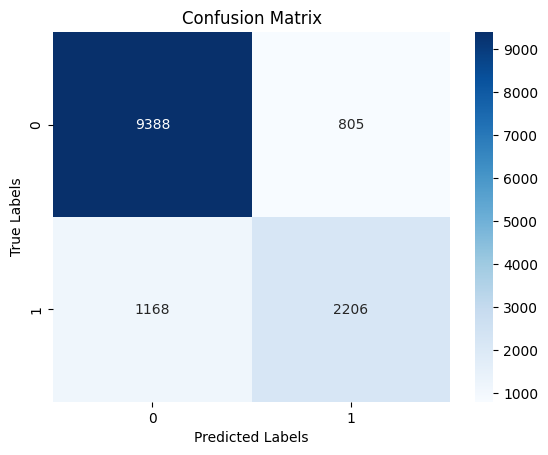

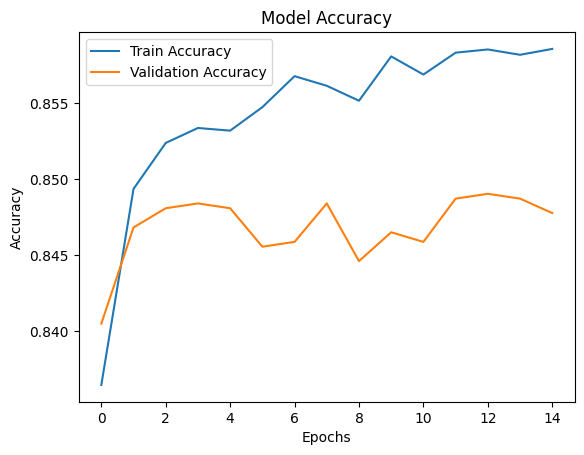


Total time taken for training and evaluation: 37.25 seconds


Data with PCA

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8035 - loss: 0.4107 - val_accuracy: 0.8462 - val_loss: 0.3282
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8479 - loss: 0.3276 - val_accuracy: 0.8440 - val_loss: 0.3217
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8500 - loss: 0.3202 - val_accuracy: 0.8446 - val_loss: 0.3219
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8528 - loss: 0.3167 - val_accuracy: 0.8503 - val_loss: 0.3190
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8568 - loss: 0.3098 - val_accuracy: 0.8468 - val_loss: 0.3171
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8514 - loss: 0.3170 - val_accuracy: 0.8493 - val_loss: 0.3152
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8579 - loss: 0.3077 - val_accuracy: 0.8481 - val_loss: 0.3187
Epoch 8/100
891/891

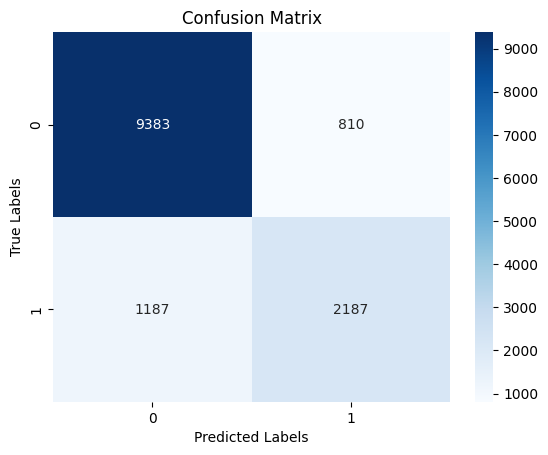

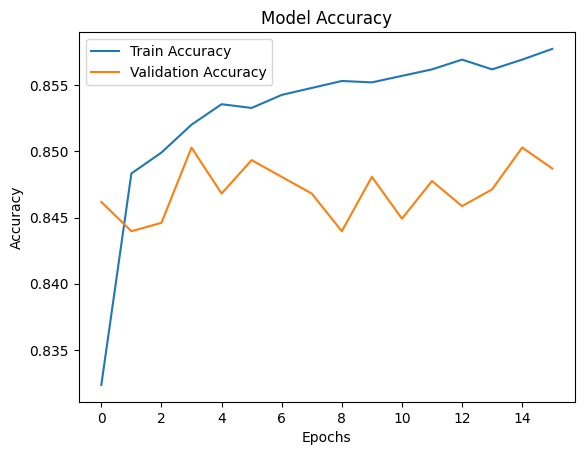


Total time taken for training and evaluation: 45.86 seconds



In [ ]:
#Training the dataset without PCA
print("Data without PCA \n")
dataset_training_comparison(adult_data, adult_target.to_numpy())

# #Tranining the dataset with PCA
print("\nData with PCA\n")
dataset_training_comparison(adult_data_pca, adult_target.to_numpy())

As we can see from the results here, the dataset without PCA performs slighlty better than the one with PCA and it also is computed/trained in less time so it is efficient both computationally and acurately.

We can also see that the early stopping mechanism is activated relatively early in the process, which means that the model would not benefit anymore by training but would be prone to overfitting and loss.

In later steps we will keep the epochs at the same number as it seems a good choice (along with the early stopping mechanism)

From now on we will be only using the dataset without PCA for further experimentation.

## **Model Selection - Training**


*   In this step we are going to try out different combnations of parameters based on the MLP - Base model and find the best combination of parameters that give off the best results.

*   The models from now on are going to be rated based on their accuracy, althgough other performance metrics such as: Precision, Recall, F1 Score are going to be computed.










*   Learning rate --> 0.0001 to 1.0 - 10 equal intervals

The accuracy of these 10 models will be recorded and based on the highest two more trials will be conducted to find a more appropriate and specifc learning rate, because these initial trials cover a really broad range



In [ ]:
# Create a list of 10 equally seperated values in the interval 0.0001 - 1.0
lr_values = np.linspace(0.0001, 1.0, num=10)

# Print each value formatted as a floating-point number
for value in lr_values:
    print(f"{value:.4f}")

# A function to train the base MLP model with these different learning rates

def train_mlp_learning_rate(learning_rate, dataset_features_data, dataset_target_data):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(100, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Compile the model
    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nTest Accuracy: {test_accuracy}\n")
    print(f"\nPrecision: {precision}\n")
    print(f"\nRecall: {recall}\n")
    print(f"\nF1 Score: {f1}\n\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"\nTotal time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy


0.0001
0.1112
0.2223
0.3334
0.4445
0.5556
0.6667
0.7778
0.8889
1.0000


Created a function that trains the Base Model - MLP with the different learning rates.

Next step is to compute the models

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7354 - loss: 0.5288 - val_accuracy: 0.8212 - val_loss: 0.3762
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8308 - loss: 0.3701 - val_accuracy: 0.8354 - val_loss: 0.3467
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8364 - loss: 0.3469 - val_accuracy: 0.8427 - val_loss: 0.3373
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8419 - loss: 0.3427 - val_accuracy: 0.8440 - val_loss: 0.3308
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8428 - loss: 0.3355 - val_accuracy: 0.8440 - val_loss: 0.3272
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8507 - loss: 0.3221 - val_accuracy: 0.8478 - val_loss: 0.3239
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8492 - loss: 0.3230 - val_accuracy: 0.8474 - val_loss: 0.3218
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8513 - loss: 0.3201 - val_accu

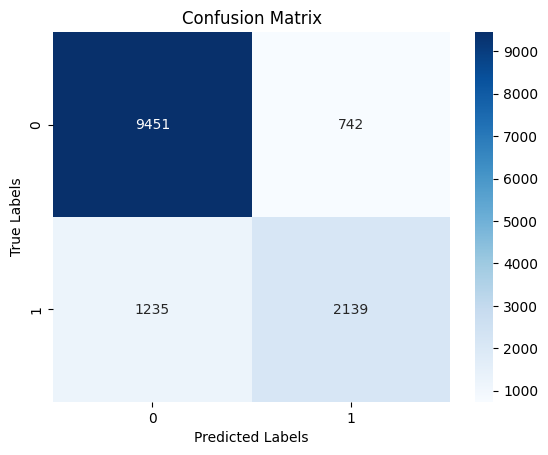

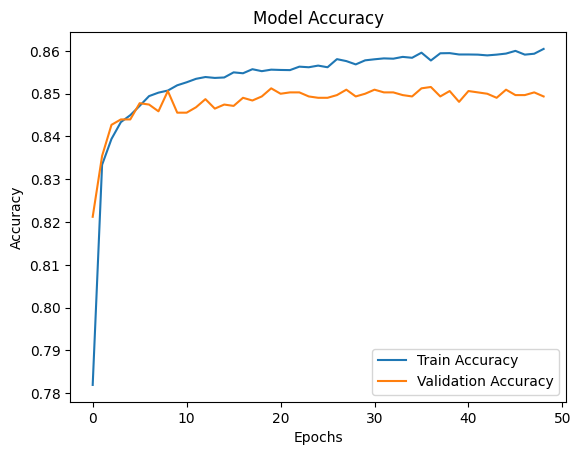


Total time taken for training and evaluation: 116.98 seconds

Trial 1: Learning Rate = 0.0001, Accuracy = 0.8543

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7749 - loss: 2.1041 - val_accuracy: 0.8105 - val_loss: 0.4789
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.6135 - val_accuracy: 0.7644 - val_loss: 9.5463
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7991 - loss: 3.8464 - val_accuracy: 0.8348 - val_loss: 0.4283
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8228 - loss: 0.7517 - val_accuracy: 0.7824 - val_loss: 0.4203
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8137 - loss: 0.5342 - val_accuracy: 0.7941 - val_loss: 0.4302
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8161 - loss: 0.6242 - val_accuracy: 0.7672 - val_loss: 0.4862
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8046 - loss: 0.5453 - val_accuracy: 0.7858 -

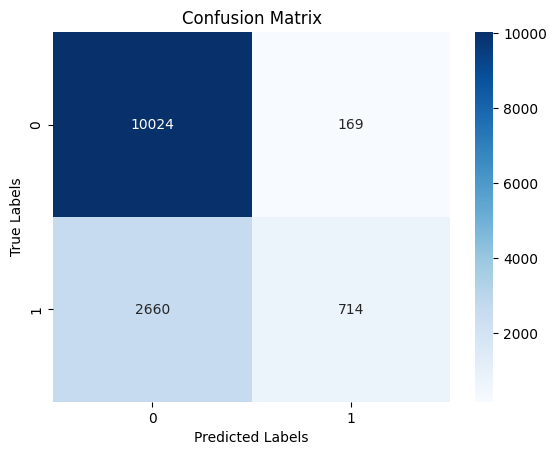

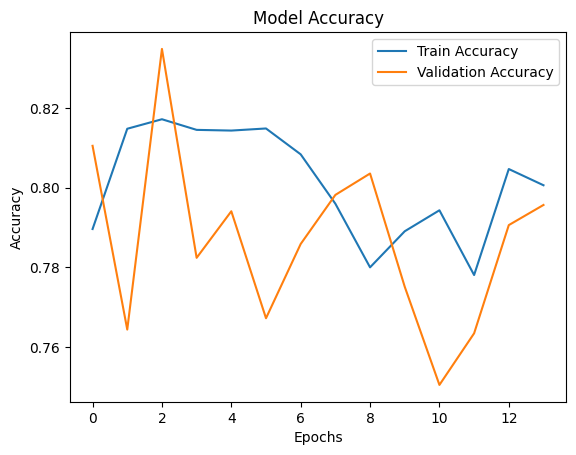


Total time taken for training and evaluation: 35.84 seconds

Trial 2: Learning Rate = 0.1112, Accuracy = 0.7915

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7649 - loss: 14.8600 - val_accuracy: 0.7694 - val_loss: 1.5030
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7736 - loss: 7.1707 - val_accuracy: 0.7713 - val_loss: 0.7954
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7743 - loss: 5.8407 - val_accuracy: 0.7666 - val_loss: 0.5753
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7646 - loss: 3.6920 - val_accuracy: 0.6822 - val_loss: 0.4585
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7637 - loss: 2.0984 - val_accuracy: 0.7798 - val_loss: 0.4128
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7702 - loss: 1.1164 - val_accuracy: 0.7502 - val_loss: 0.5596
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7595 - loss: 1.0469 - val_accuracy: 0.7562 -

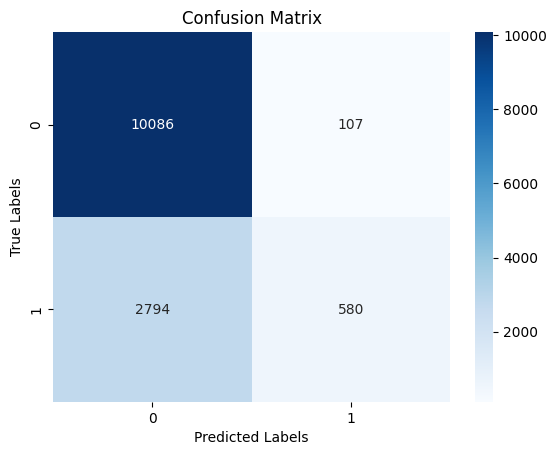

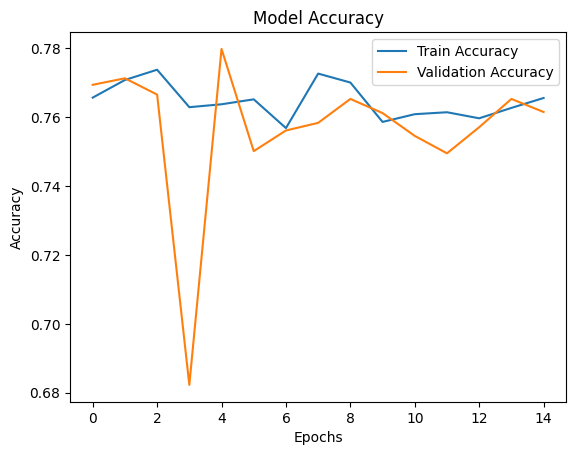


Total time taken for training and evaluation: 35.54 seconds

Trial 3: Learning Rate = 0.2223, Accuracy = 0.7862

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7646 - loss: 13.8901 - val_accuracy: 0.6453 - val_loss: 45.5760
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7585 - loss: 9.1976 - val_accuracy: 0.7647 - val_loss: 18.7179
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7582 - loss: 11.3822 - val_accuracy: 0.7457 - val_loss: 0.5344
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 1.5858 - val_accuracy: 0.7599 - val_loss: 0.5343
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7555 - loss: 0.7236 - val_accuracy: 0.7401 - val_loss: 0.9156
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7601 - loss: 1.1886 - val_accuracy: 0.7574 - val_loss: 4.3753
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7602 - loss: 2.4284 - val_accuracy: 0.758

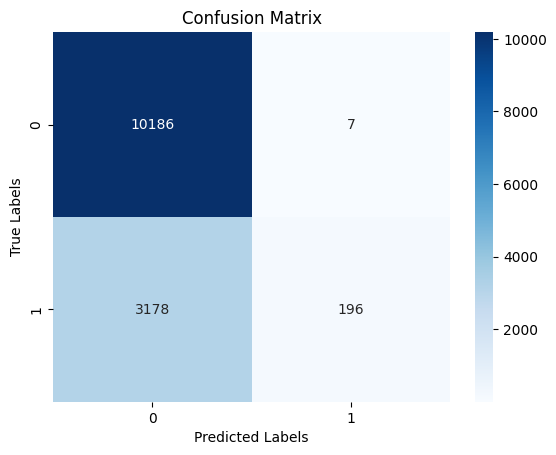

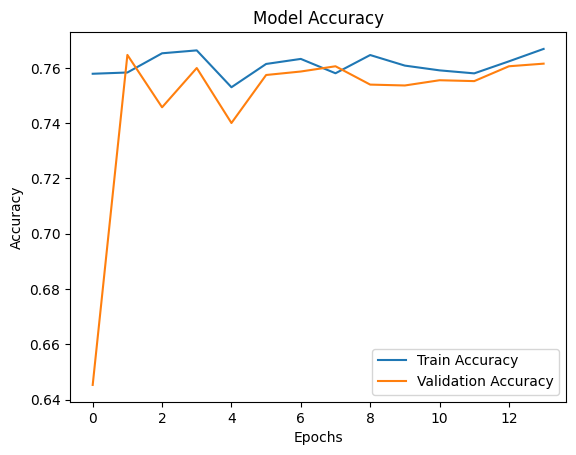


Total time taken for training and evaluation: 32.23 seconds

Trial 4: Learning Rate = 0.3334, Accuracy = 0.7652

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7552 - loss: 35.1590 - val_accuracy: 0.6677 - val_loss: 1.7015
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7808 - loss: 7.3930 - val_accuracy: 0.7562 - val_loss: 11.1071
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7708 - loss: 16.6718 - val_accuracy: 0.7536 - val_loss: 0.5966
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7844 - loss: 1.7579 - val_accuracy: 0.7817 - val_loss: 0.6679
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7860 - loss: 1.2716 - val_accuracy: 0.7713 - val_loss: 0.4885
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7818 - loss: 0.6430 - val_accuracy: 0.7675 - val_loss: 0.5809
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7729 - loss: 0.8740 - val_accuracy: 0.7669

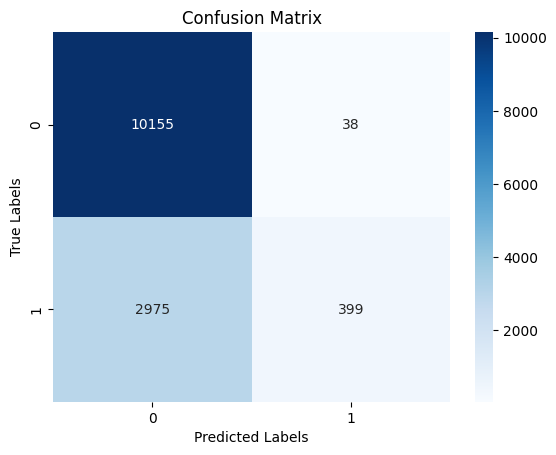

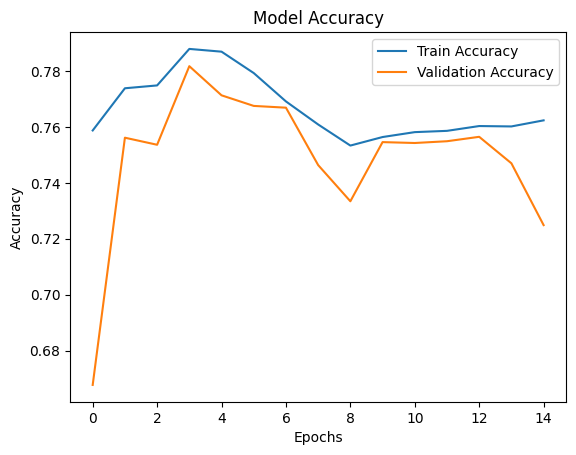


Total time taken for training and evaluation: 34.41 seconds

Trial 5: Learning Rate = 0.4445, Accuracy = 0.7779

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7647 - loss: 101.4092 - val_accuracy: 0.7767 - val_loss: 24.4092
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7779 - loss: 28.1377 - val_accuracy: 0.7701 - val_loss: 13.4221
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7767 - loss: 16.2132 - val_accuracy: 0.7464 - val_loss: 202.6573
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 39.6544 - val_accuracy: 0.7599 - val_loss: 1.0153
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7656 - loss: 1.3398 - val_accuracy: 0.7574 - val_loss: 0.8352
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7607 - loss: 0.9378 - val_accuracy: 0.7536 - val_loss: 0.6068
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7610 - loss: 0.8741 - val_accuracy: 

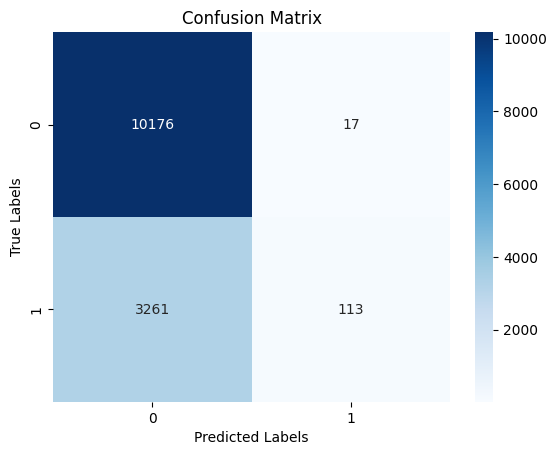

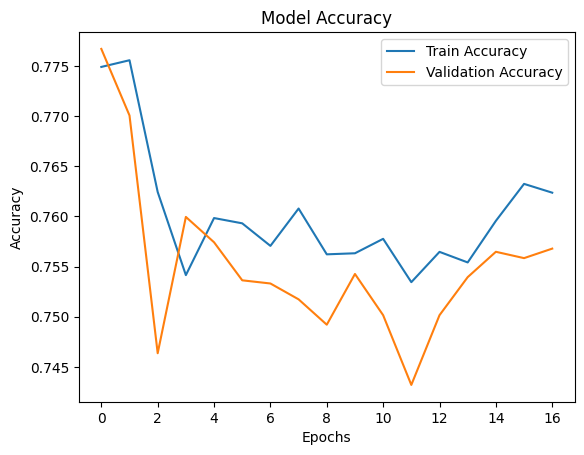


Total time taken for training and evaluation: 42.24 seconds

Trial 6: Learning Rate = 0.5556, Accuracy = 0.7584

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7540 - loss: 157.1273 - val_accuracy: 0.7495 - val_loss: 206.0152
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7533 - loss: 73.9415 - val_accuracy: 0.7451 - val_loss: 26.9008
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7499 - loss: 15.7897 - val_accuracy: 0.7236 - val_loss: 38.5809
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 39.4148 - val_accuracy: 0.7555 - val_loss: 2.2014
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 2.9552 - val_accuracy: 0.7464 - val_loss: 1.3339
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7550 - loss: 1.8728 - val_accuracy: 0.7511 - val_loss: 1.6891
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7486 - loss: 3.9100 - val_accuracy: 

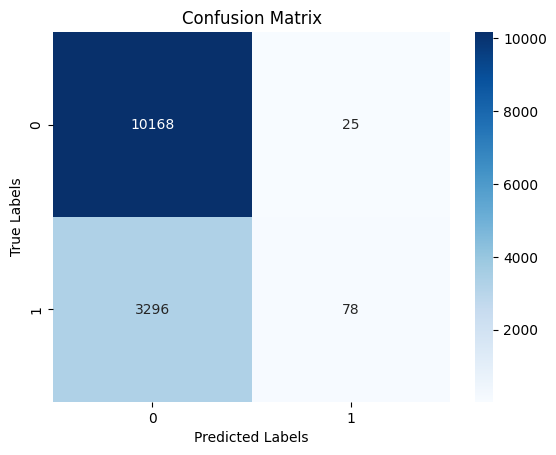

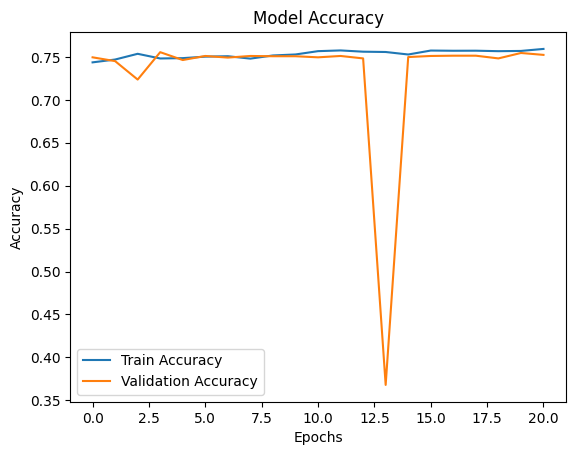


Total time taken for training and evaluation: 49.28 seconds

Trial 7: Learning Rate = 0.6667, Accuracy = 0.7552

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7543 - loss: 174.1654 - val_accuracy: 0.7840 - val_loss: 2.7838
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7814 - loss: 111.0062 - val_accuracy: 0.7653 - val_loss: 24.6665
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7725 - loss: 104.8490 - val_accuracy: 0.7530 - val_loss: 77.7739
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7677 - loss: 52.9314 - val_accuracy: 0.7615 - val_loss: 2.3026
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7574 - loss: 61.3111 - val_accuracy: 0.7650 - val_loss: 0.9238
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7660 - loss: 10.5571 - val_accuracy: 0.7533 - val_loss: 1.8749
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7508 - loss: 2.3128 - val_accuracy

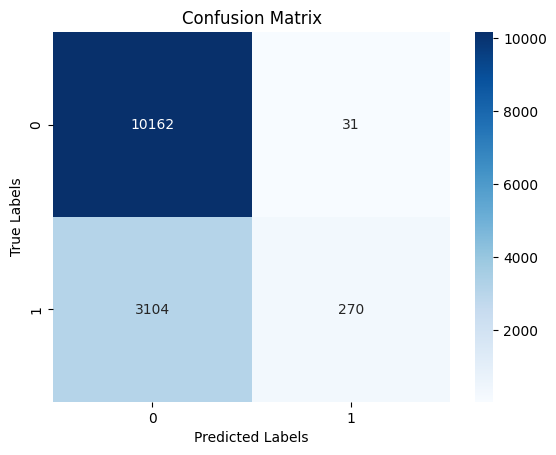

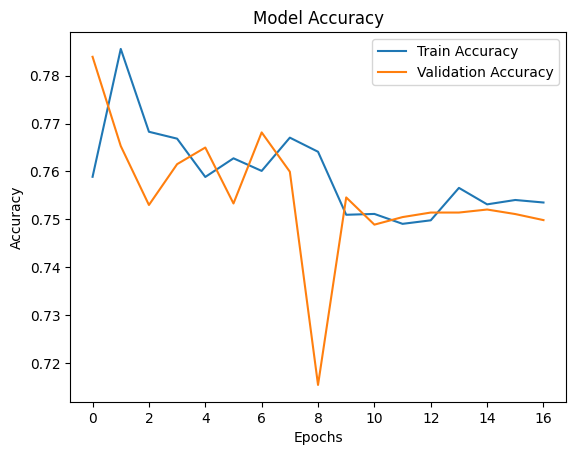


Total time taken for training and evaluation: 38.11 seconds

Trial 8: Learning Rate = 0.7778, Accuracy = 0.7689

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 134.3307 - val_accuracy: 0.6971 - val_loss: 8.2346
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7332 - loss: 34.7181 - val_accuracy: 0.7577 - val_loss: 1.2899
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 4.0951 - val_accuracy: 0.7489 - val_loss: 1.0796
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7553 - loss: 3.4914 - val_accuracy: 0.7577 - val_loss: 0.5860
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7677 - loss: 0.8489 - val_accuracy: 0.7666 - val_loss: 5.0468
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7703 - loss: 1.4092 - val_accuracy: 0.7587 - val_loss: 14.2331
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7549 - loss: 13.5921 - val_accuracy: 0.75

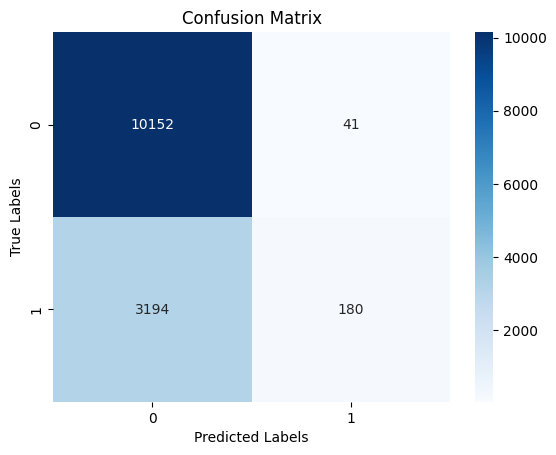

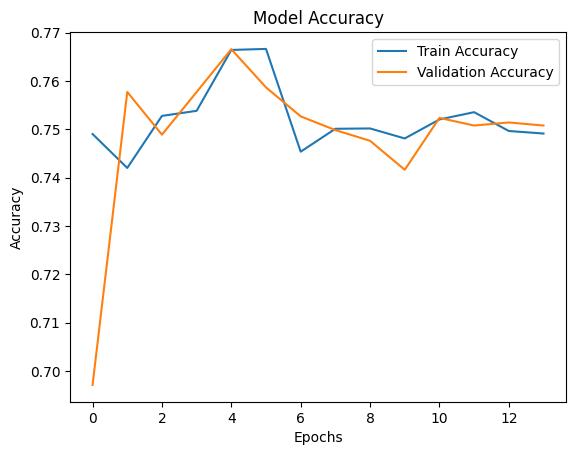


Total time taken for training and evaluation: 34.51 seconds

Trial 9: Learning Rate = 0.8889, Accuracy = 0.7616

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7548 - loss: 336.6404 - val_accuracy: 0.7704 - val_loss: 90.1701
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7556 - loss: 331.0844 - val_accuracy: 0.7656 - val_loss: 19.5857
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7606 - loss: 131.1531 - val_accuracy: 0.7539 - val_loss: 20.4833
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7575 - loss: 78.9615 - val_accuracy: 0.7492 - val_loss: 18.8693
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7581 - loss: 46.1238 - val_accuracy: 0.7618 - val_loss: 0.7186
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7628 - loss: 4.5353 - val_accuracy: 0.7533 - val_loss: 0.7464
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7573 - loss: 1.6503 - val_accurac

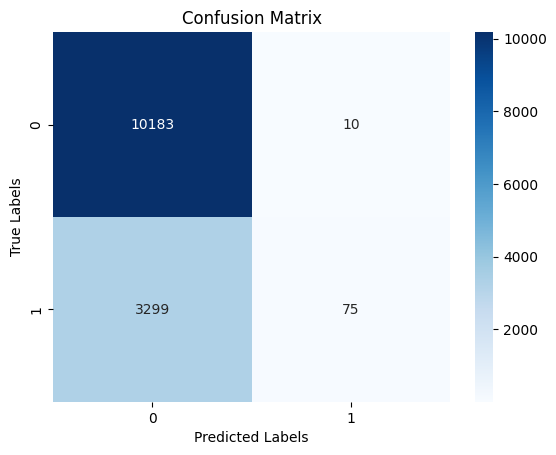

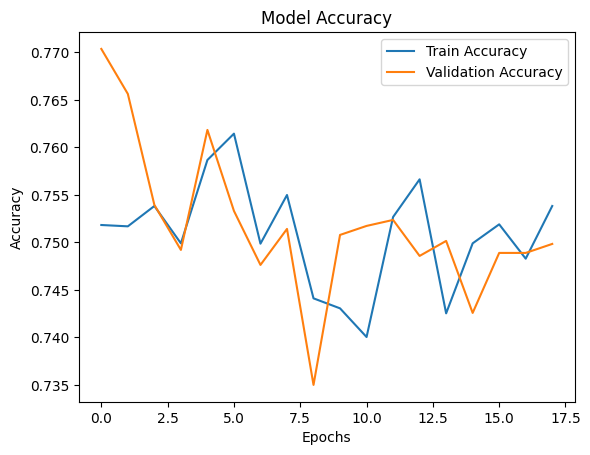


Total time taken for training and evaluation: 44.41 seconds

Trial 10: Learning Rate = 1.0000, Accuracy = 0.7561


The highest accuracy of: 0.8543 was achieved when the model was trained with learning rate: 0.0001

The optimal learning rate is between these two learning rates: 1. 0.0001 ; 2. 0.1112



In [ ]:

learning_rates = []
max_accuracy = 0
best_lr = 0

for index, lr in enumerate(lr_values):
    accuracy = train_mlp_learning_rate(lr, adult_data, adult_target.to_numpy())
    learning_rates.append((lr, accuracy))

    print(f"Trial {index + 1}: Learning Rate = {lr:.4f}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_lr = lr

# Sort by accuracy in ascending order
learning_rates.sort()

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with learning rate: {best_lr:.4f}")

if len(learning_rates) > 1:
    print(f"\nThe optimal learning rate is between these two learning rates: 1. {learning_rates[0][0]:.4f} ; 2. {learning_rates[1][0]:.4f}\n")
else:
    print("\nMore data is needed to determine an optimal learning rate range.\n")



*   Optimal Learning Rate - 0.0001 (default for Adam Optimizer)

Every other learning rate performed really poor except of precision sometimes, so this means we will be denoting the learning rate of 0.0001 as the optimal learning rate

Further testing will be conducted betrween 0.0001 and 0.1112 to see if a more optimal learning rate can be found

The cells with the red color denote the best performances for each learning rate



*   Learning rate --> 0.0001 to 0.1112 - 10 equal intervals

The accuracy of these 10 models will be recorded and the highest will be considered the final optimal learning rate so we can continue with combinations of other parameters.

0.0001
0.0124
0.0248
0.0371
0.0495
0.0618
0.0742
0.0865
0.0989
0.1112



Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7227 - loss: 0.5349 - val_accuracy: 0.8323 - val_loss: 0.3617
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8398 - loss: 0.3541 - val_accuracy: 0.8405 - val_loss: 0.3379
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.3362 - val_accuracy: 0.8455 - val_loss: 0.3304
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8462 - loss: 0.3311 - val_accuracy: 0.8440 - val_loss: 0.3269
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8478 - loss: 0.3286 - val_accuracy: 0.8427 - val_loss: 0.3246
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8506 - loss: 0.3263 - val_accuracy: 0.8430 - val_loss: 0.3233
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8532 - loss: 0.3178 - val_accuracy: 0.8459 - val_loss: 0.3217
Epoch 8/100
891/891 ━━━━

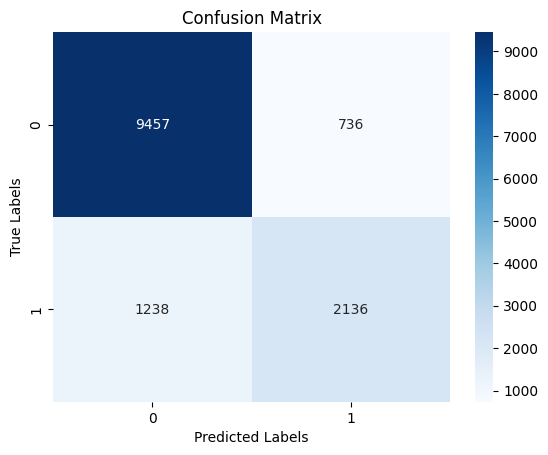

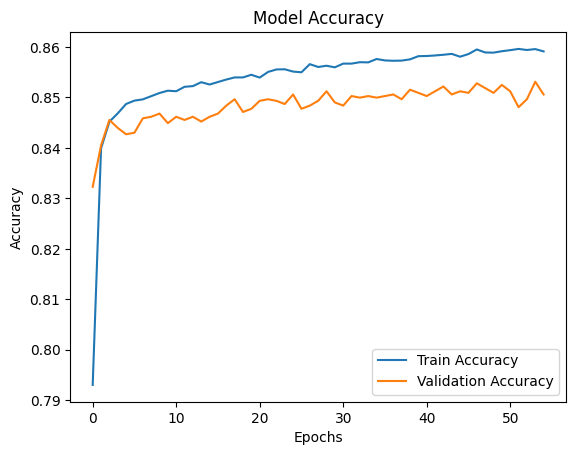


Total time taken for training and evaluation: 124.68 seconds

Trial 1: Learning Rate = 0.0001, Accuracy = 0.8545

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8278 - loss: 0.3701 - val_accuracy: 0.8500 - val_loss: 0.3198
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.3314 - val_accuracy: 0.8430 - val_loss: 0.3220
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8506 - loss: 0.3263 - val_accuracy: 0.8427 - val_loss: 0.3303
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8502 - loss: 0.3330 - val_accuracy: 0.8481 - val_loss: 0.3193
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8522 - loss: 0.3243 - val_accuracy: 0.8437 - val_loss: 0.3239
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8506 - loss: 0.3240 - val_accuracy: 0.8519 - val_loss: 0.3259
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3194 - val_accuracy: 0.8500 -

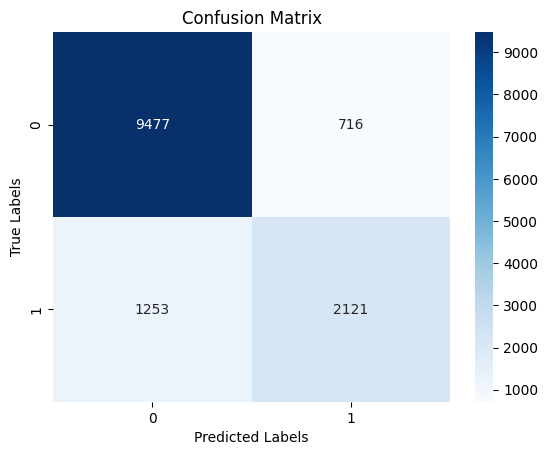

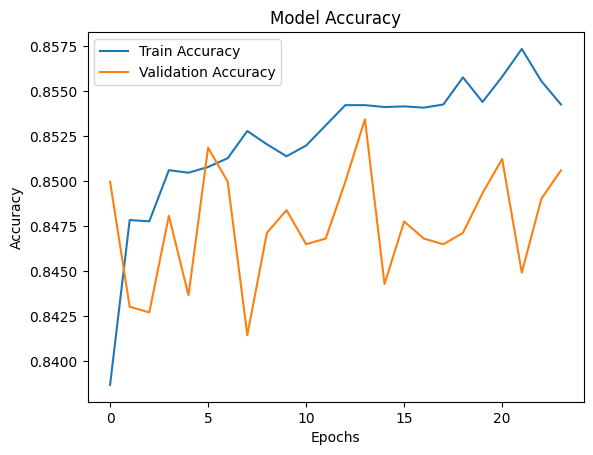


Total time taken for training and evaluation: 56.69 seconds

Trial 2: Learning Rate = 0.0124, Accuracy = 0.8549

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8183 - loss: 0.4017 - val_accuracy: 0.8386 - val_loss: 0.3375
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8400 - loss: 0.3703 - val_accuracy: 0.8367 - val_loss: 0.3630
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8453 - loss: 0.3515 - val_accuracy: 0.8414 - val_loss: 0.3483
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8466 - loss: 0.3401 - val_accuracy: 0.8424 - val_loss: 0.3317
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8412 - loss: 0.3472 - val_accuracy: 0.8367 - val_loss: 0.3398
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - loss: 0.3241 - val_accuracy: 0.8452 - val_loss: 0.3373
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3361 - val_accuracy: 0.8370 - 

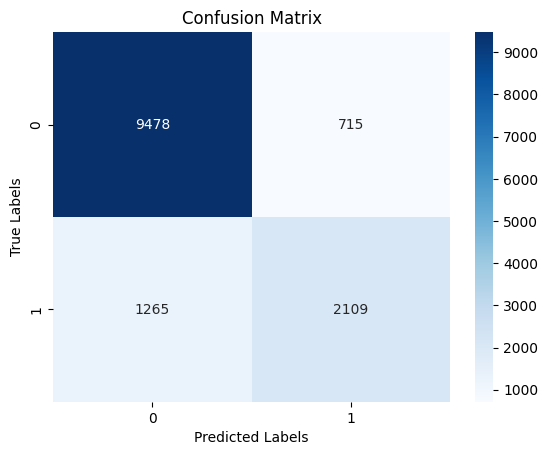

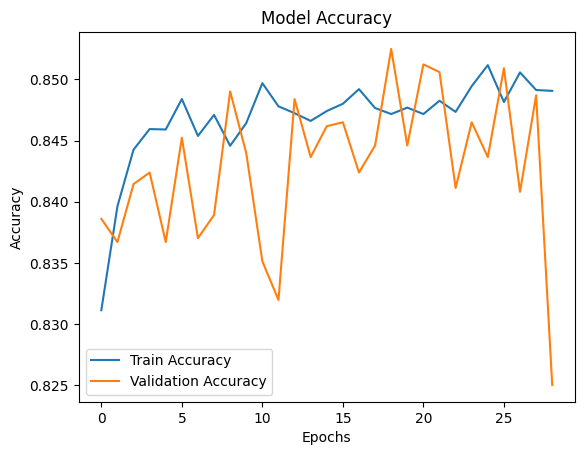


Total time taken for training and evaluation: 63.85 seconds

Trial 3: Learning Rate = 0.0248, Accuracy = 0.8541

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8107 - loss: 0.5390 - val_accuracy: 0.8361 - val_loss: 0.3902
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8285 - loss: 0.5316 - val_accuracy: 0.8389 - val_loss: 0.3412
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8417 - loss: 0.3779 - val_accuracy: 0.8440 - val_loss: 0.3303
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8464 - loss: 0.3425 - val_accuracy: 0.8455 - val_loss: 0.3388
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8389 - loss: 0.3717 - val_accuracy: 0.8430 - val_loss: 0.3302
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8459 - loss: 0.3390 - val_accuracy: 0.8421 - val_loss: 0.3458
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8422 - loss: 0.3487 - val_accuracy: 0.8418 - 

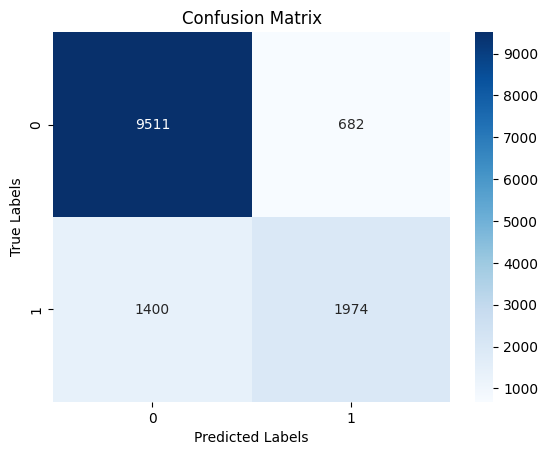

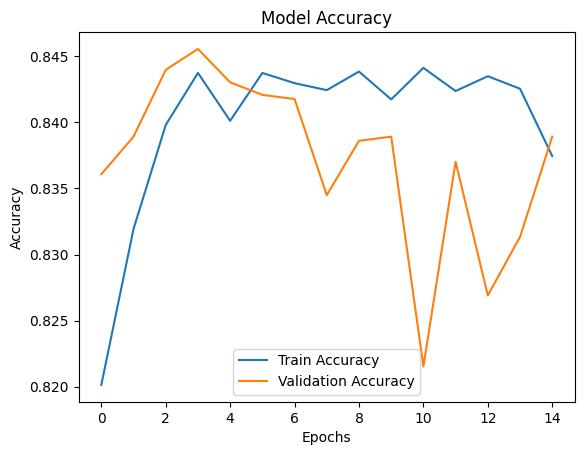


Total time taken for training and evaluation: 39.25 seconds

Trial 4: Learning Rate = 0.0371, Accuracy = 0.8465

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8050 - loss: 0.5908 - val_accuracy: 0.8108 - val_loss: 0.4191
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.5096 - val_accuracy: 0.8386 - val_loss: 0.3744
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8397 - loss: 0.3831 - val_accuracy: 0.8140 - val_loss: 1.1794
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.7382 - val_accuracy: 0.8209 - val_loss: 0.3508
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8439 - loss: 0.3570 - val_accuracy: 0.8383 - val_loss: 0.3364
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8454 - loss: 0.3514 - val_accuracy: 0.8364 - val_loss: 0.3473
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3550 - val_accuracy: 0.8168 - 

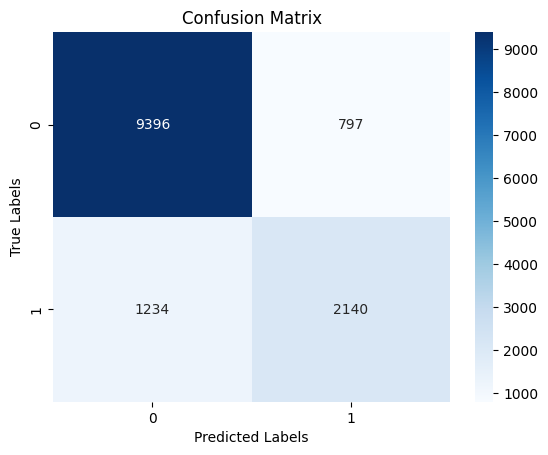

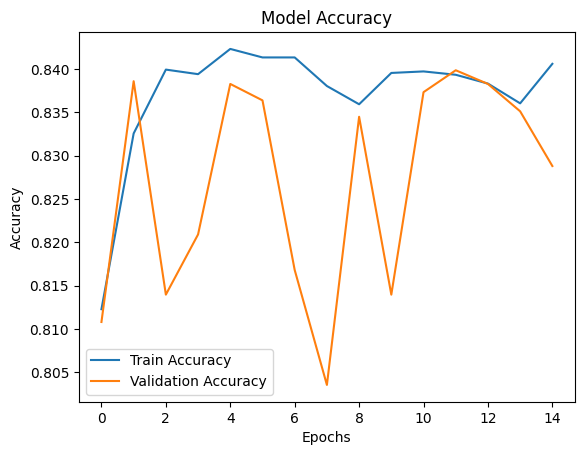


Total time taken for training and evaluation: 35.01 seconds

Trial 5: Learning Rate = 0.0495, Accuracy = 0.8503

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7903 - loss: 0.8760 - val_accuracy: 0.7025 - val_loss: 0.9028
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8311 - loss: 0.4564 - val_accuracy: 0.8260 - val_loss: 0.3756
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8328 - loss: 0.5273 - val_accuracy: 0.8351 - val_loss: 0.3362
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8433 - loss: 0.3590 - val_accuracy: 0.8282 - val_loss: 0.3503
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.3704 - val_accuracy: 0.8354 - val_loss: 0.3739
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8412 - loss: 0.3679 - val_accuracy: 0.8424 - val_loss: 0.3590
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.3877 - val_accuracy: 0.8335 - 

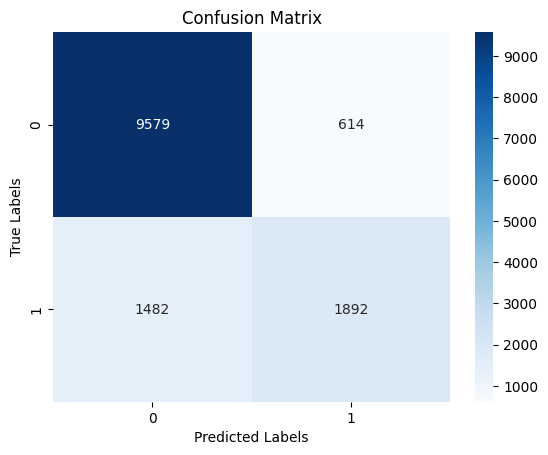

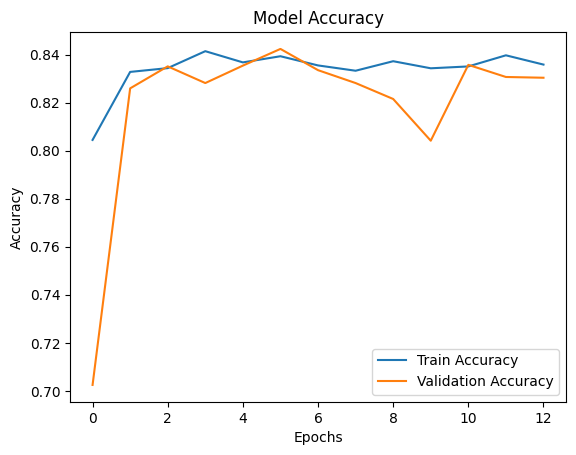


Total time taken for training and evaluation: 31.64 seconds

Trial 6: Learning Rate = 0.0618, Accuracy = 0.8455

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7901 - loss: 0.9078 - val_accuracy: 0.7988 - val_loss: 0.3862
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7929 - loss: 1.4422 - val_accuracy: 0.8370 - val_loss: 0.3588
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8344 - loss: 0.4372 - val_accuracy: 0.8184 - val_loss: 0.3579
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8362 - loss: 0.3716 - val_accuracy: 0.7979 - val_loss: 0.4475
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8226 - loss: 0.4880 - val_accuracy: 0.8402 - val_loss: 0.3742
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8370 - loss: 0.3864 - val_accuracy: 0.8298 - val_loss: 0.3612
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8354 - loss: 0.4039 - val_accuracy: 0.8291 - 

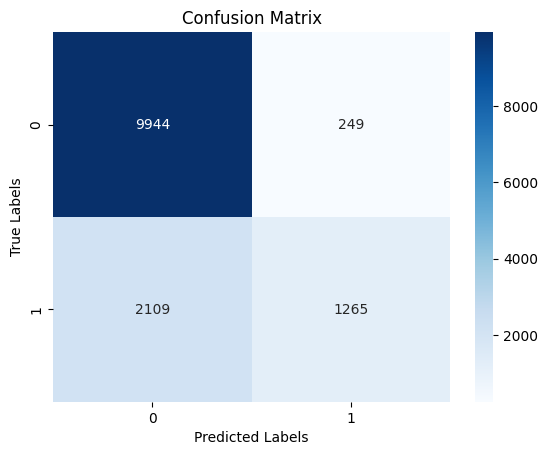

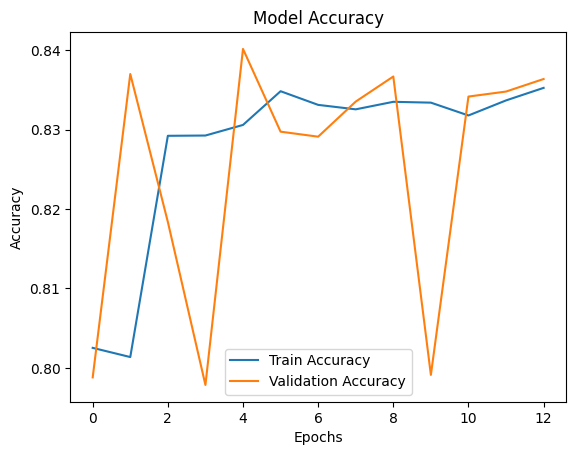


Total time taken for training and evaluation: 35.35 seconds

Trial 7: Learning Rate = 0.0742, Accuracy = 0.8262

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7912 - loss: 1.9816 - val_accuracy: 0.8181 - val_loss: 0.4569
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 1.1191 - val_accuracy: 0.8048 - val_loss: 0.5354
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7817 - loss: 1.0366 - val_accuracy: 0.7893 - val_loss: 0.4625
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7951 - loss: 0.6724 - val_accuracy: 0.8114 - val_loss: 0.3713
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8209 - loss: 0.4677 - val_accuracy: 0.8386 - val_loss: 0.3705
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8333 - loss: 0.4002 - val_accuracy: 0.7931 - val_loss: 0.4548
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.4343 - val_accuracy: 0.8193 - 

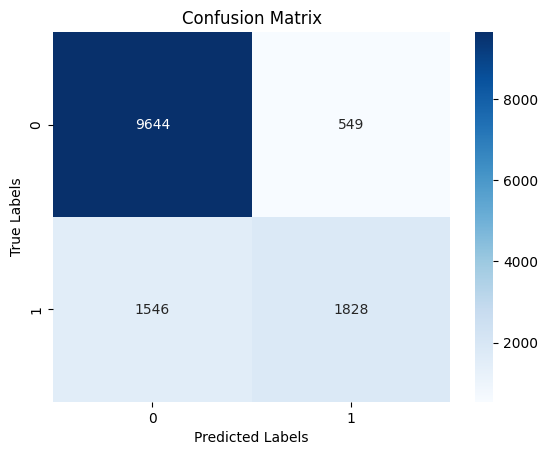

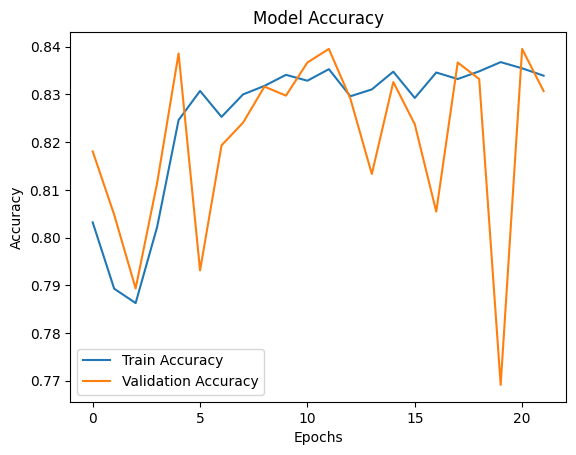


Total time taken for training and evaluation: 53.34 seconds

Trial 8: Learning Rate = 0.0865, Accuracy = 0.8456

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7835 - loss: 1.1580 - val_accuracy: 0.7682 - val_loss: 2.4572
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7743 - loss: 1.8526 - val_accuracy: 0.7776 - val_loss: 0.4008
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7832 - loss: 0.6279 - val_accuracy: 0.7849 - val_loss: 0.5129
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8065 - loss: 0.6040 - val_accuracy: 0.7843 - val_loss: 0.4217
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7926 - loss: 0.4358 - val_accuracy: 0.7830 - val_loss: 0.4309
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8128 - loss: 0.4821 - val_accuracy: 0.7944 - val_loss: 0.4207
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7858 - loss: 0.4711 - val_accuracy: 0.8013 - 

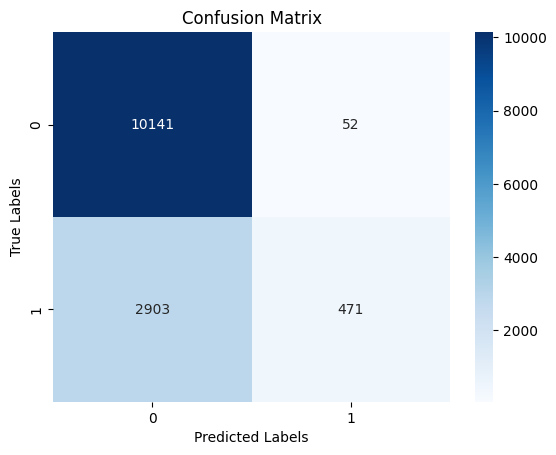

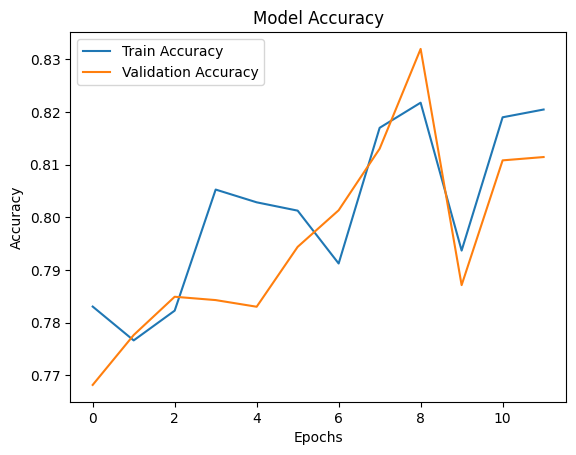


Total time taken for training and evaluation: 28.92 seconds

Trial 9: Learning Rate = 0.0989, Accuracy = 0.7822

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7805 - loss: 4.2687 - val_accuracy: 0.7821 - val_loss: 1.0177
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 4.4190 - val_accuracy: 0.7710 - val_loss: 0.9469
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7812 - loss: 2.5141 - val_accuracy: 0.7922 - val_loss: 0.3831
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8145 - loss: 0.8966 - val_accuracy: 0.8165 - val_loss: 0.3904
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8180 - loss: 0.5601 - val_accuracy: 0.8326 - val_loss: 0.3985
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8188 - loss: 0.5223 - val_accuracy: 0.7862 - val_loss: 0.4312
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8249 - loss: 0.5544 - val_accuracy: 0.8051 - 

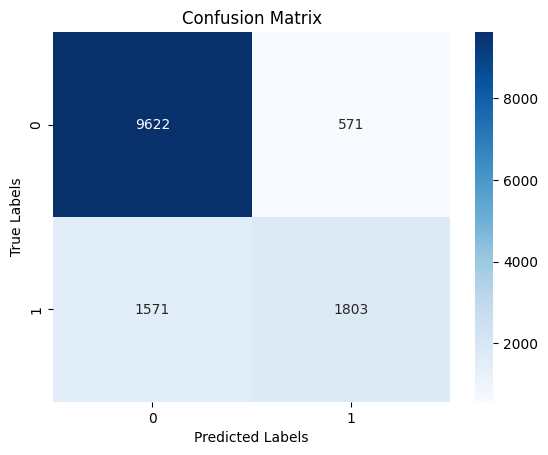

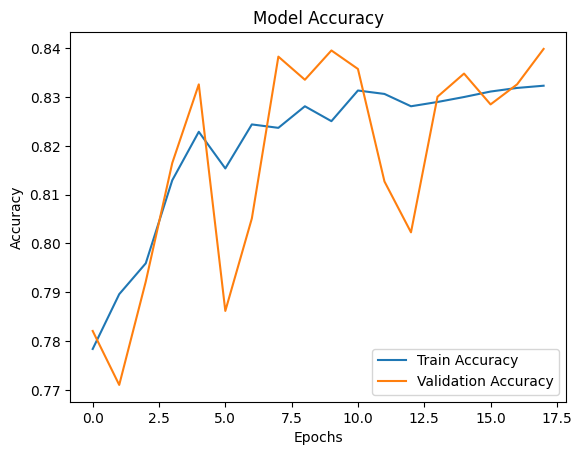


Total time taken for training and evaluation: 46.72 seconds

Trial 10: Learning Rate = 0.1112, Accuracy = 0.8421


The highest accuracy of: 0.8549 was achieved when the model was trained with learning rate: 0.0124

The optimal learning rate is between these two learning rates: 1. 0.0001 ; 2. 0.0124



In [ ]:
# Create a list of 10 equally seperated values in the interval 0.0001 - 1.0
lr_values_final = np.linspace(0.0001, 0.1112, num=10)

# Print each value formatted as a floating-point number
for value in lr_values_final:
    print(f"{value:.4f}")

learning_rates = []
max_accuracy = 0
best_lr = 0

print("\n\n")

for index, lr in enumerate(lr_values_final):
    accuracy = train_mlp_learning_rate(lr, adult_data, adult_target.to_numpy())
    learning_rates.append((lr, accuracy))

    print(f"Trial {index + 1}: Learning Rate = {lr:.4f}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_lr = lr

# Sort by accuracy in ascending order
learning_rates.sort()

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with learning rate: {best_lr:.4f}")

if len(learning_rates) > 1:
    print(f"\nThe optimal learning rate is between these two learning rates: 1. {learning_rates[0][0]:.4f} ; 2. {learning_rates[1][0]:.4f}\n")
else:
    print("\nMore data is needed to determine an optimal learning rate range.\n")


*   Optimal Learning Rate - 0.0124 (final optimal learning rate)

The highest accuracy of: 0.8548 was achieved when the model was trained with learning rate: 0.0124

Best performance metrics seem to be distributed accross dfferent values of the learning rate

Our final optimal learning rate will be considered 0.0124 because it has got the highest accuraccy and close to the highest other metrics.
Every other trial will be conducted with this learning rate but different other parameters



*   Batch Sizes  --> 32,64,128,256, 512

We will test batch sizes of 32, 64, 128, 256, and 512 to train our model. The accuracy for each model trained with these batch sizes will be recorded. Based on which batch size yields the highest accuracy, we will proceed to the next steps in our parameter tuning process

In [ ]:
# Function to train the MLP Model with different batch sizes

def train_mlp_batch_size(batch_value, dataset_features_data, dataset_target_data):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(100, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=batch_value, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy





Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8325 - loss: 0.3679 - val_accuracy: 0.8446 - val_loss: 0.3213
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8427 - loss: 0.3408 - val_accuracy: 0.8399 - val_loss: 0.3266
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8500 - loss: 0.3277 - val_accuracy: 0.8427 - val_loss: 0.3267
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8532 - loss: 0.3227 - val_accuracy: 0.8437 - val_loss: 0.3250
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8508 - loss: 0.3262 - val_accuracy: 0.8427 - val_loss: 0.3282
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8528 - loss: 0.3260 - val_accuracy: 0.8481 - val_loss: 0.3172
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8480 - loss: 0.3255 - val_accuracy: 0.8478 - val_loss: 0.3165
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8548 - loss: 0.3199 - val_a

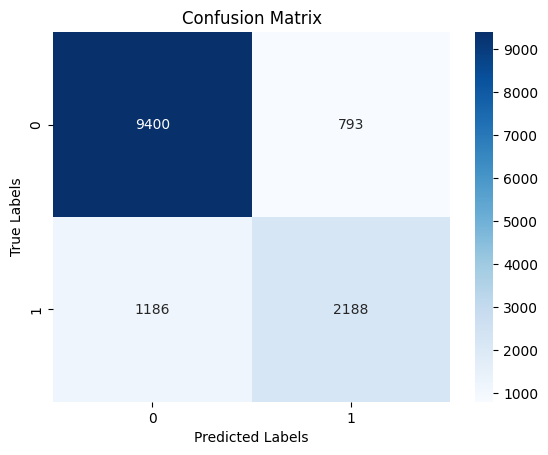

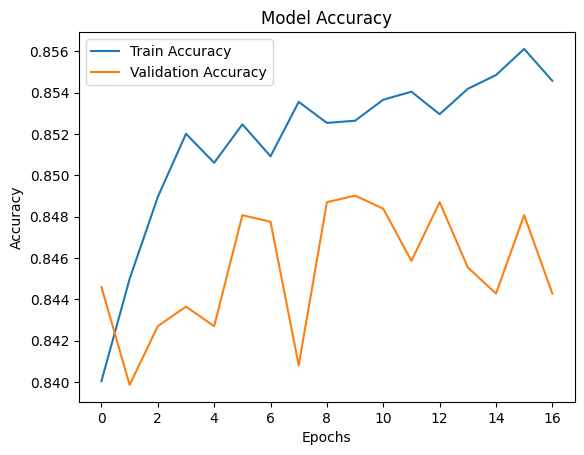

Total time taken for training and evaluation: 41.83 seconds

Trial 1: Batch Size = 32, Accuracy = 0.8541

Epoch 1/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8208 - loss: 0.3767 - val_accuracy: 0.8478 - val_loss: 0.3292
Epoch 2/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.3333 - val_accuracy: 0.8462 - val_loss: 0.3180
Epoch 3/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.3235 - val_accuracy: 0.8478 - val_loss: 0.3178
Epoch 4/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3205 - val_accuracy: 0.8367 - val_loss: 0.3384
Epoch 5/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3253 - val_accuracy: 0.8421 - val_loss: 0.3239
Epoch 6/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3191 - val_accuracy: 0.8465 - val_loss: 0.3239
Epoch 7/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3270 - val_accuracy: 0.8452 - val_loss

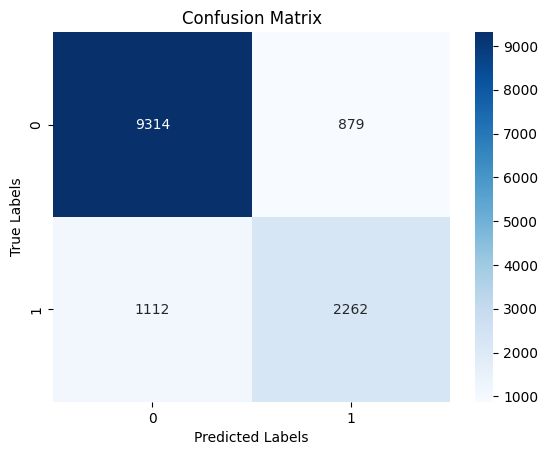

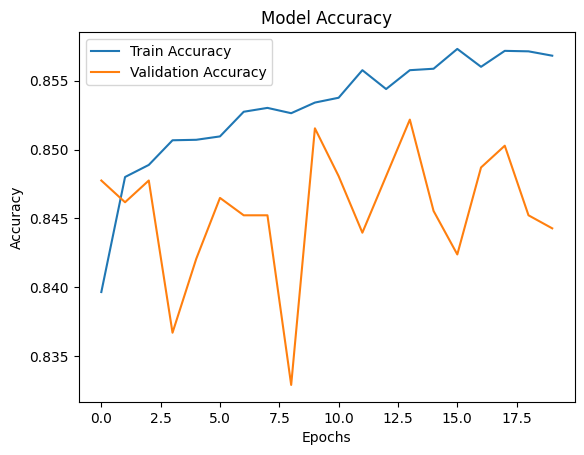

Total time taken for training and evaluation: 29.46 seconds

Trial 2: Batch Size = 64, Accuracy = 0.8532

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8240 - loss: 0.3703 - val_accuracy: 0.8427 - val_loss: 0.3233
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3313 - val_accuracy: 0.8455 - val_loss: 0.3181
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3164 - val_accuracy: 0.8449 - val_loss: 0.3188
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.3130 - val_accuracy: 0.8462 - val_loss: 0.3170
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3159 - val_accuracy: 0.8471 - val_loss: 0.3182
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3080 - val_accuracy: 0.8459 - val_loss: 0.3173
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3127 - val_accuracy: 0.8430 - val_loss

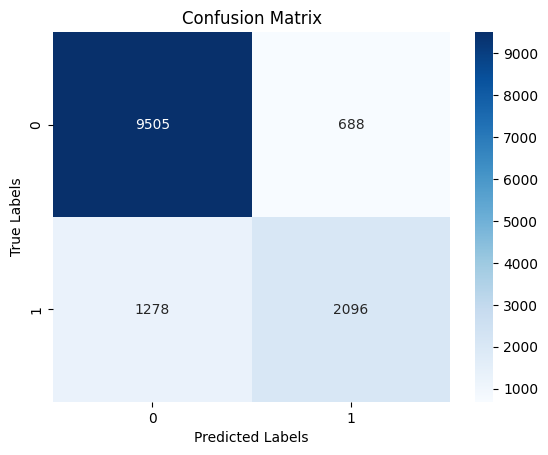

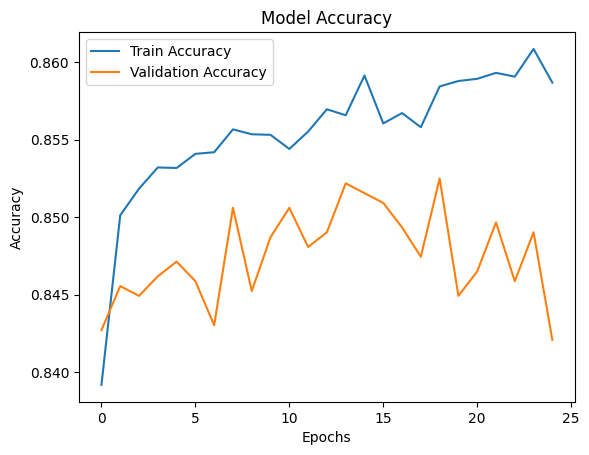

Total time taken for training and evaluation: 19.88 seconds

Trial 3: Batch Size = 128, Accuracy = 0.8551

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8068 - loss: 0.4037 - val_accuracy: 0.8440 - val_loss: 0.3243
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3194 - val_accuracy: 0.8430 - val_loss: 0.3227
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.3251 - val_accuracy: 0.8455 - val_loss: 0.3174
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8526 - loss: 0.3130 - val_accuracy: 0.8437 - val_loss: 0.3211
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.3178 - val_accuracy: 0.8506 - val_loss: 0.3171
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.3101 - val_accuracy: 0.8509 - val_loss: 0.3154
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3189 - val_accuracy: 0.8468 - val_los

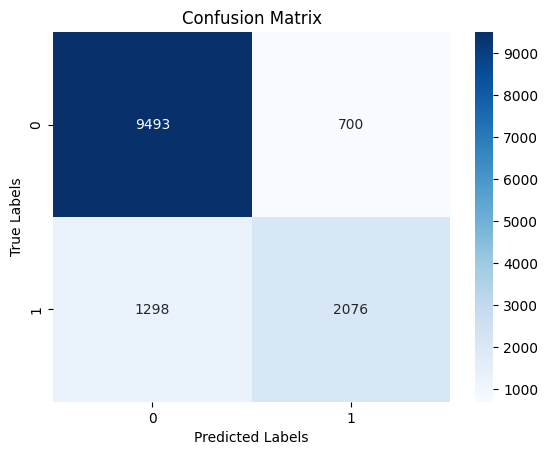

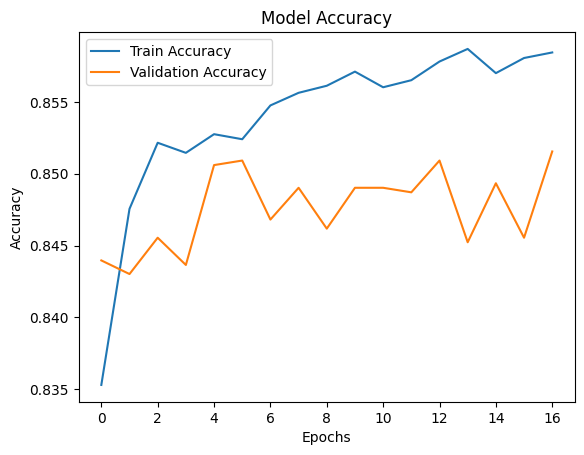

Total time taken for training and evaluation: 13.93 seconds

Trial 4: Batch Size = 256, Accuracy = 0.8527

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8136 - loss: 0.3935 - val_accuracy: 0.8427 - val_loss: 0.3287
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3239 - val_accuracy: 0.8490 - val_loss: 0.3184
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.3113 - val_accuracy: 0.8418 - val_loss: 0.3239
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.3147 - val_accuracy: 0.8440 - val_loss: 0.3210
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8537 - loss: 0.3116 - val_accuracy: 0.8471 - val_loss: 0.3163
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8546 - loss: 0.3123 - val_accuracy: 0.8474 - val_loss: 0.3168
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8531 - loss: 0.3118 - val_accuracy: 0.8471 - val_loss: 0.3176
Epo

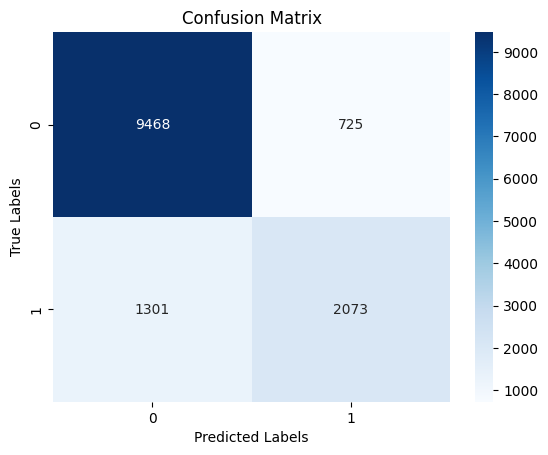

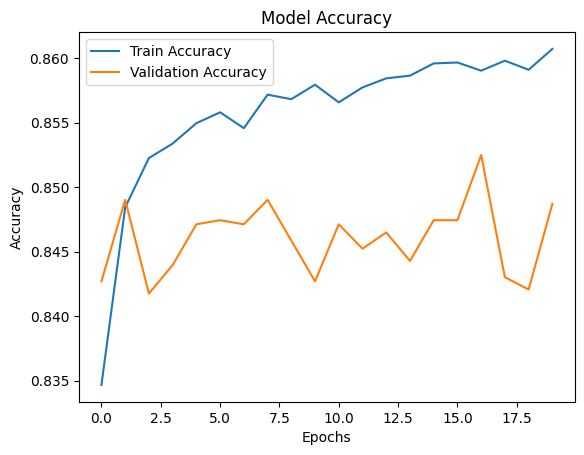

Total time taken for training and evaluation: 9.42 seconds

Trial 5: Batch Size = 512, Accuracy = 0.8507


The highest accuracy of: 0.8551 was achieved when the model was trained with batch size of: 128


In [ ]:
# Create a list of batch size
batch_values = [ 32, 64, 128, 256, 512]

max_accuracy = 0
best_batch = 0

print("\n\n")

for index, batch in enumerate(batch_values):
    accuracy = train_mlp_batch_size(batch, adult_data, adult_target.to_numpy())

    print(f"Trial {index + 1}: Batch Size = {batch}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_batch = batch

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with batch size of: {best_batch}")



*   Optimal Batch Size - 128

The highest accuracy of: 0.855 was achieved when the model was trained with a batch size of: 128


Best performance metrics seem to be distributed accross batch sizes of 64 and 128

Our final optimal batch size will be considered 128 because it has got the highest accuraccy and close to the highest other metrics.
Every other trial will be conducted with this batch size and prior learning rate but different other parameters



*   Number of Layers  --> 1,2,3

We will test different number of hidden layers such as: 1,2,3 to train our model.

The accuracy for each model trained with these number of hidden layers will be recorded.

Based on which number of hidden layers yields the highest accuracy, we will proceed to the next steps in our parameter tuning process

Our model is already giving us good enough results with 1 hidden layer so we are not expecting a big change of performance.

In [ ]:
# function to train the mlp with different number of hidden layers

def train_mlp_hidden_layers(dataset_features_data, dataset_target_data, num_layers=1):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture based on the number of hidden layers
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))  # Input layer

    # Adding the specified number of hidden layers with halving neurons
    neurons = 100  # Starting number of neurons for the first hidden layer
    for i in range(num_layers):
        model.add(Dense(neurons, activation="relu"))
        neurons //= 2  # Halve the number of neurons for the next layer

    model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy




Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8274 - loss: 0.3702 - val_accuracy: 0.8437 - val_loss: 0.3295
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.3285 - val_accuracy: 0.8459 - val_loss: 0.3201
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3133 - val_accuracy: 0.8500 - val_loss: 0.3168
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8457 - loss: 0.3249 - val_accuracy: 0.8474 - val_loss: 0.3143
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.3218 - val_accuracy: 0.8506 - val_loss: 0.3145
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3202 - val_accuracy: 0.8506 - val_loss: 0.3161
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3135 - val_accuracy: 0.8474 - val_loss: 0.3198
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.3163 - val_a

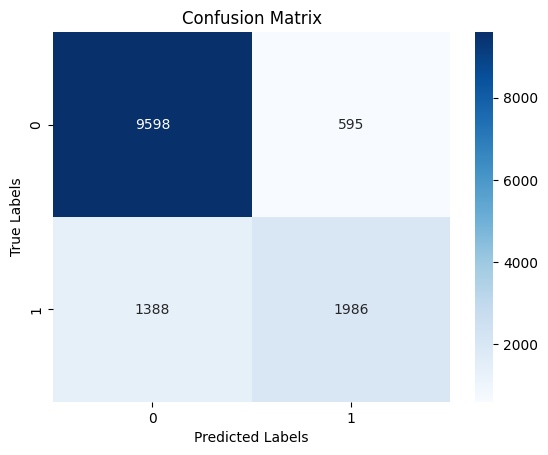

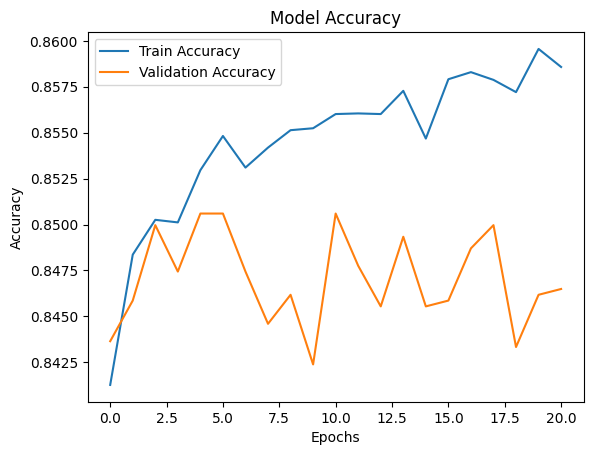

Total time taken for training and evaluation: 16.46 seconds

Trial 1: Number of Hidden Layers = 1, Accuracy = 0.8538

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8296 - loss: 0.3671 - val_accuracy: 0.8392 - val_loss: 0.3279
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8473 - loss: 0.3265 - val_accuracy: 0.8493 - val_loss: 0.3227
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3177 - val_accuracy: 0.8465 - val_loss: 0.3251
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3161 - val_accuracy: 0.8468 - val_loss: 0.3149
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3141 - val_accuracy: 0.8462 - val_loss: 0.3171
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3081 - val_accuracy: 0.8503 - val_loss: 0.3138
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.3099 - val_accuracy: 0.845

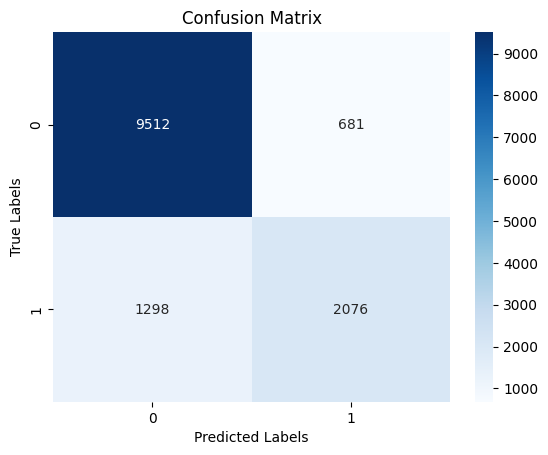

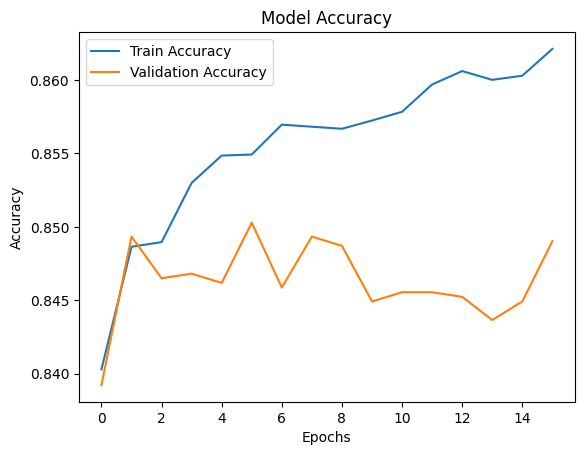

Total time taken for training and evaluation: 14.68 seconds

Trial 2: Number of Hidden Layers = 2, Accuracy = 0.8541

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8155 - loss: 0.3791 - val_accuracy: 0.8395 - val_loss: 0.3357
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8477 - loss: 0.3272 - val_accuracy: 0.8512 - val_loss: 0.3182
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8487 - loss: 0.3205 - val_accuracy: 0.8503 - val_loss: 0.3193
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.3144 - val_accuracy: 0.8487 - val_loss: 0.3190
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3145 - val_accuracy: 0.8478 - val_loss: 0.3143
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8545 - loss: 0.3142 - val_accuracy: 0.8455 - val_loss: 0.3218
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.3071 - val_accuracy: 0.845

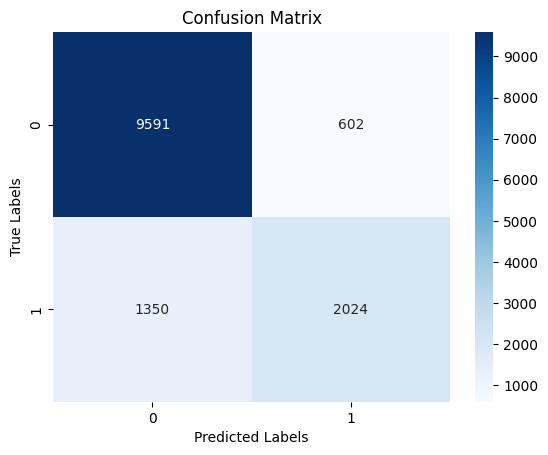

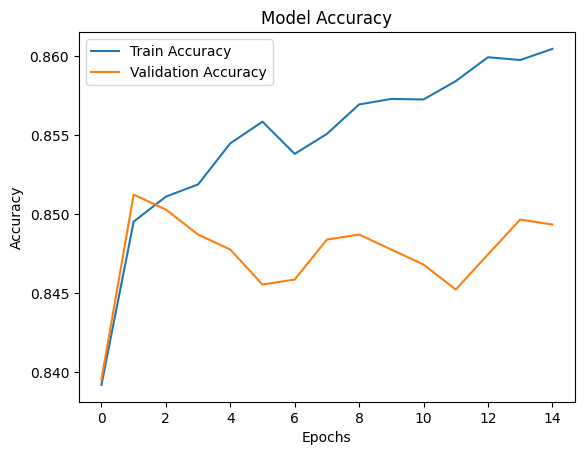

Total time taken for training and evaluation: 15.68 seconds

Trial 3: Number of Hidden Layers = 3, Accuracy = 0.8561


The highest accuracy of: 0.8561 was achieved when the model was trained with 3 hidden layers



In [ ]:
num_layers = [1,2,3]

max_accuracy = 0
best_number_layers = 0

print("\n\n")

for index, num in enumerate(num_layers):

    accuracy =  train_mlp_hidden_layers(adult_data, adult_target.to_numpy(), num)

    print(f"Trial {index + 1}: Number of Hidden Layers = {num}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_number_layers = num

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with {best_number_layers} hidden layers\n")



*   Optimal Number of Hidden Layers - 3

The highest accuracy of: 0.8561 was achieved when the model was trained with 3 hidden layers

Best performance metrics seem to be distributed accross 2 and 3 hidden layers

Our final optimal number of hidden layers will be considered 3 because it has got the highest accuraccy and close to the highest other metrics.


Every other trial will be conducted with this number of hidden layers and prior batch size and learning rate but different other parameters



*   Number of neurons

In this step the model is going to be trained using different numer of neurons accrros the hidden layers so the combination that gives off the best accuracy can be found



In [ ]:
# function to train the mlp with different number of neurons in hidden layers

def train_mlp_neurons(dataset_features_data, dataset_target_data, neurons):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(neurons[0], activation="relu"),
        Dense(neurons[1], activation="relu"),
        Dense(neurons[2], activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy





Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8150 - loss: 0.3758 - val_accuracy: 0.8452 - val_loss: 0.3188
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8527 - loss: 0.3197 - val_accuracy: 0.8433 - val_loss: 0.3262
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3204 - val_accuracy: 0.8414 - val_loss: 0.3247
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8561 - loss: 0.3189 - val_accuracy: 0.8500 - val_loss: 0.3145
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3157 - val_accuracy: 0.8503 - val_loss: 0.3108
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.3148 - val_accuracy: 0.8481 - val_loss: 0.3145
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.3074 - val_accuracy: 0.8459 - val_loss: 0.3178
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8577 - loss: 0.3085 - val_a

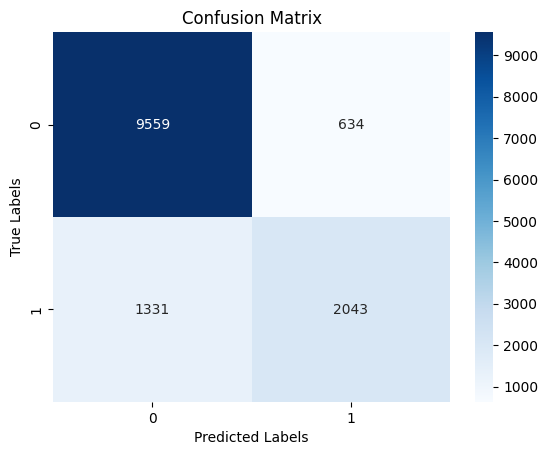

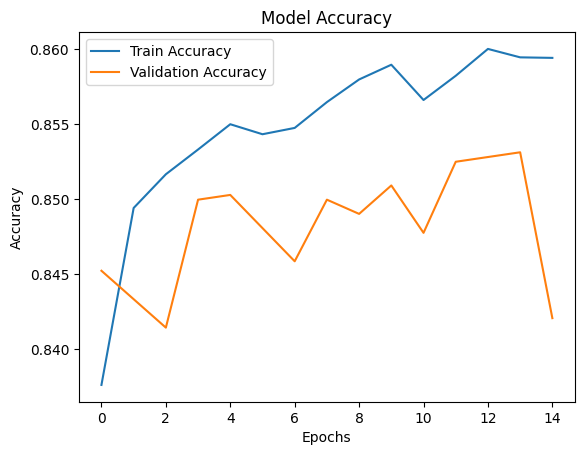

Total time taken for training and evaluation: 14.56 seconds

Trial 1: Number of Neurons = [100, 50, 25], Accuracy = 0.8552

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8306 - loss: 0.3720 - val_accuracy: 0.8446 - val_loss: 0.3201
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8467 - loss: 0.3332 - val_accuracy: 0.8433 - val_loss: 0.3183
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.3214 - val_accuracy: 0.8449 - val_loss: 0.3207
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3245 - val_accuracy: 0.8519 - val_loss: 0.3143
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3108 - val_accuracy: 0.8465 - val_loss: 0.3201
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3113 - val_accuracy: 0.8462 - val_loss: 0.3195
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8599 - loss: 0.3021 - val_accuracy:

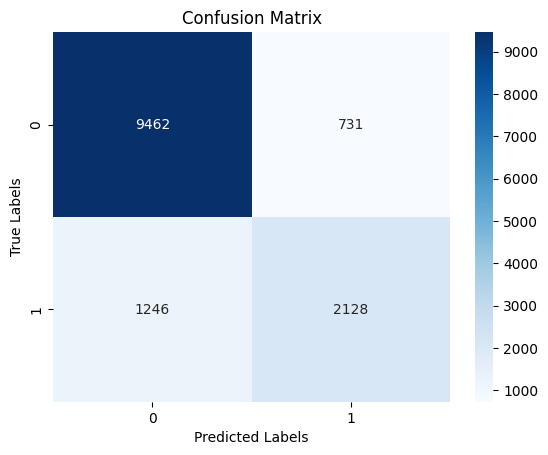

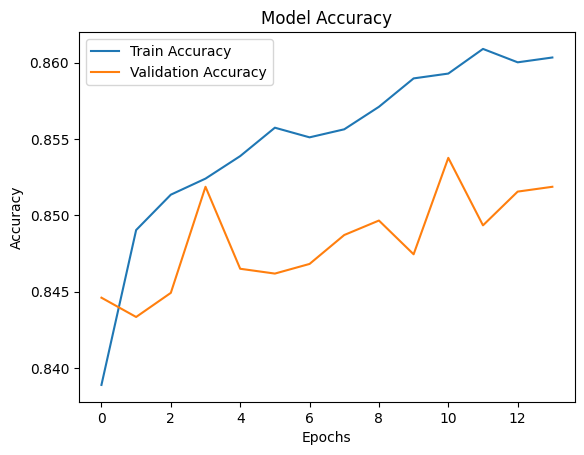

Total time taken for training and evaluation: 14.18 seconds

Trial 2: Number of Neurons = [128, 64, 32], Accuracy = 0.8543

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8144 - loss: 0.3864 - val_accuracy: 0.8465 - val_loss: 0.3245
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8468 - loss: 0.3276 - val_accuracy: 0.8484 - val_loss: 0.3214
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3192 - val_accuracy: 0.8503 - val_loss: 0.3165
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3197 - val_accuracy: 0.8484 - val_loss: 0.3164
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3117 - val_accuracy: 0.8474 - val_loss: 0.3183
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8548 - loss: 0.3134 - val_accuracy: 0.8468 - val_loss: 0.3179
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3107 - val_accuracy:

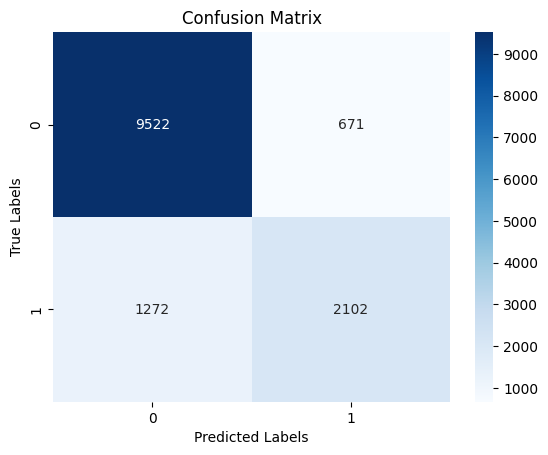

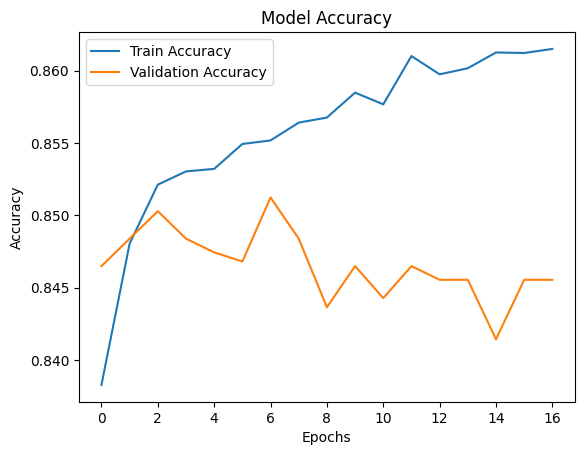

Total time taken for training and evaluation: 26.84 seconds

Trial 3: Number of Neurons = [256, 128, 64], Accuracy = 0.8568

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8254 - loss: 0.4628 - val_accuracy: 0.8386 - val_loss: 0.3247
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8499 - loss: 0.3226 - val_accuracy: 0.8478 - val_loss: 0.3219
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8555 - loss: 0.3199 - val_accuracy: 0.8474 - val_loss: 0.3253
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8557 - loss: 0.3129 - val_accuracy: 0.8497 - val_loss: 0.3198
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8517 - loss: 0.3201 - val_accuracy: 0.8487 - val_loss: 0.3159
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8513 - loss: 0.3136 - val_accuracy: 0.8506 - val_loss: 0.3165
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8536 - loss: 0.3070 - val_accur

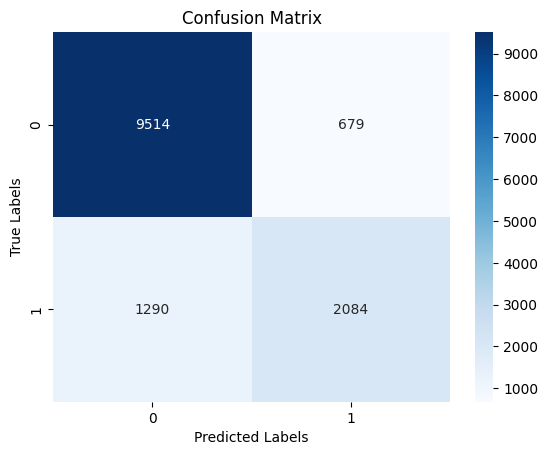

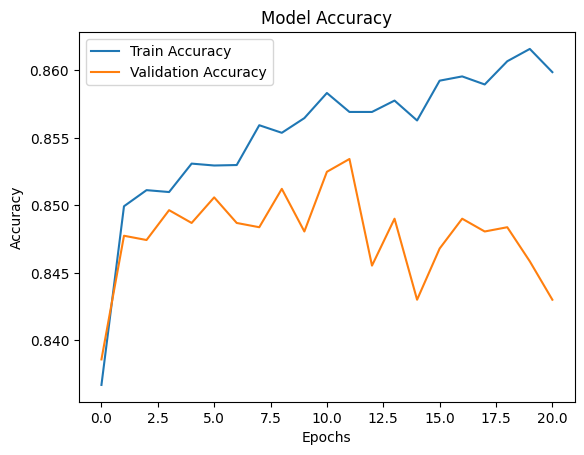

Total time taken for training and evaluation: 53.82 seconds

Trial 4: Number of Neurons = [512, 256, 128], Accuracy = 0.8549

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8074 - loss: 0.5066 - val_accuracy: 0.8468 - val_loss: 0.3262
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8462 - loss: 0.3294 - val_accuracy: 0.8484 - val_loss: 0.3230
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8487 - loss: 0.3242 - val_accuracy: 0.8468 - val_loss: 0.3277
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8551 - loss: 0.3164 - val_accuracy: 0.8478 - val_loss: 0.3169
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8582 - loss: 0.3095 - val_accuracy: 0.8484 - val_loss: 0.3291
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8542 - loss: 0.3135 - val_accuracy: 0.8528 - val_loss: 0.3165
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8594 - loss: 0.3105 - val_

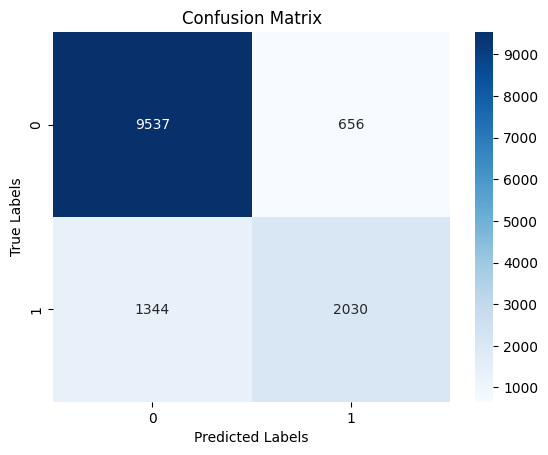

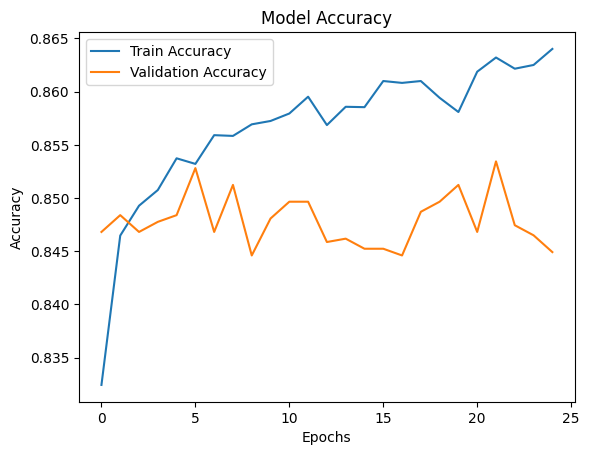

Total time taken for training and evaluation: 185.93 seconds

Trial 5: Number of Neurons = [1024, 512, 256], Accuracy = 0.8526


The highest accuracy of: 0.8568 was achieved when the model was trained with [256, 128, 64] Neurons



In [ ]:
num_neurons = [ [100,50,25], # Base model
                [128,64,32],
                [256,128,64],
                [512,256,128],
                [1024,512,256] ]

max_accuracy = 0
best_number_neurons = []

print("\n\n")

for index, num in enumerate(num_neurons):

    accuracy =  train_mlp_neurons(adult_data, adult_target.to_numpy(), num)

    print(f"Trial {index + 1}: Number of Neurons = {num}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_number_neurons = num

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with {best_number_neurons} Neurons\n")



*   Optimal Number of Neurons for the Hidden Layers - 256 - 128 - 64

The highest accuracy of: 0.8567 was achieved when the model was trained with 256 - 128 - 64 Neurons

Best performance metrics seem to be distributed but the combination with the highest accuracy is slighlty better

Our final optimal number of Neurons for the Hidden Layers will be considered 256 - 128 - 64 because it has got the highest accuraccy and close to the highest other metrics.

Every other trial will be conducted with these numbers of Neurons for the Hidden Layer and prior number of hidden layers, batch size and learning rate but different other parameters



*  Activation Functions

In this step the model is going to be trained using different activation functions accross the hidden layers so the combination that gives off the best accuracy can be found.

Functions:

*   Tanh
*   ReLu
*   Sigmoid
*   Swish - Relatively new function introduced lately
*   Leaky ReLu - More advanced approach

Soft-Max will not be used because it solves multi-class classifications and is not a solid chocie in this case






In [ ]:
# function to train the mlp with different activation functions for the hidden layers

def train_mlp_function(dataset_features_data, dataset_target_data, activation_function):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(256, activation=activation_function),
        Dense(128, activation=activation_function),
        Dense(64, activation=activation_function),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy





Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8124 - loss: 0.4183 - val_accuracy: 0.8342 - val_loss: 0.3271
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8459 - loss: 0.3342 - val_accuracy: 0.8468 - val_loss: 0.3274
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8488 - loss: 0.3286 - val_accuracy: 0.8487 - val_loss: 0.3259
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8531 - loss: 0.3246 - val_accuracy: 0.8437 - val_loss: 0.3249
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8520 - loss: 0.3178 - val_accuracy: 0.8493 - val_loss: 0.3221
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3142 - val_accuracy: 0.8484 - val_loss: 0.3138
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3152 - val_accuracy: 0.8421 - val_loss: 0.3170
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8612 - loss: 0.3026 - val_a

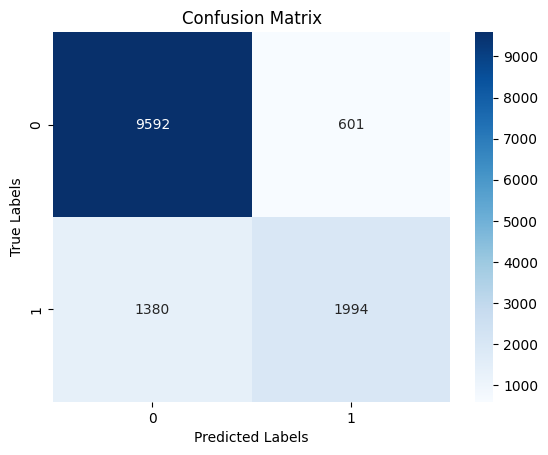

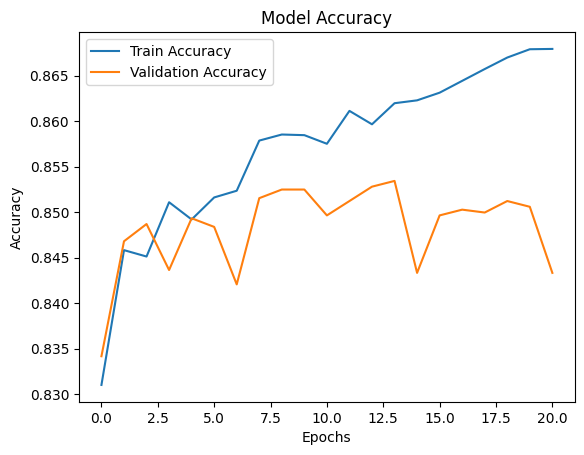

Total time taken for training and evaluation: 34.20 seconds

Trial 1: Activation Function = sigmoid, Accuracy = 0.8540

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8156 - loss: 0.3815 - val_accuracy: 0.8446 - val_loss: 0.3202
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8499 - loss: 0.3256 - val_accuracy: 0.8430 - val_loss: 0.3193
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3184 - val_accuracy: 0.8474 - val_loss: 0.3139
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8541 - loss: 0.3133 - val_accuracy: 0.8519 - val_loss: 0.3149
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8548 - loss: 0.3158 - val_accuracy: 0.8503 - val_loss: 0.3198
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8577 - loss: 0.3109 - val_accuracy: 0.8471 - val_loss: 0.3186
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8577 - loss: 0.3097 - val_accuracy: 0.8

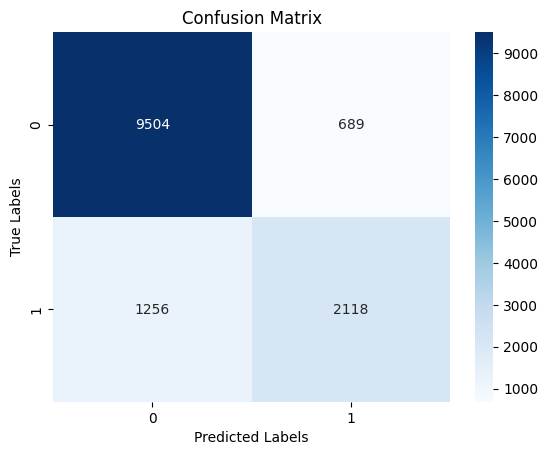

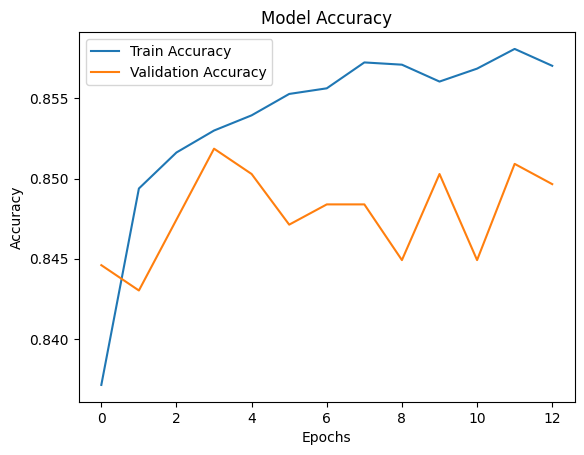

Total time taken for training and evaluation: 21.12 seconds

Trial 2: Activation Function = relu, Accuracy = 0.8566

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8021 - loss: 0.4152 - val_accuracy: 0.8323 - val_loss: 0.3363
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8472 - loss: 0.3321 - val_accuracy: 0.8455 - val_loss: 0.3279
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8463 - loss: 0.3305 - val_accuracy: 0.8418 - val_loss: 0.3302
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8498 - loss: 0.3214 - val_accuracy: 0.8449 - val_loss: 0.3275
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8452 - loss: 0.3253 - val_accuracy: 0.8272 - val_loss: 0.3467
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.3235 - val_accuracy: 0.8389 - val_loss: 0.3240
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8457 - loss: 0.3241 - val_accuracy: 0.8399

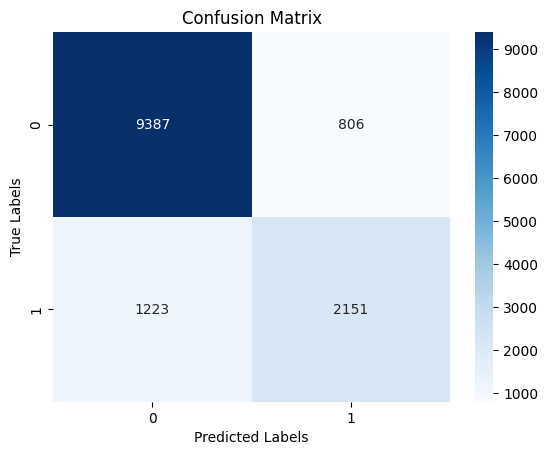

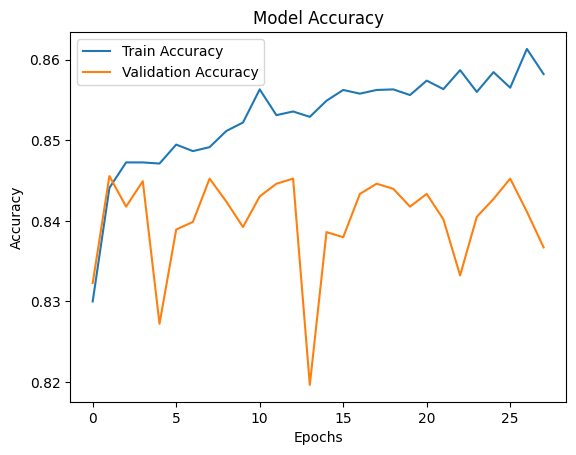

Total time taken for training and evaluation: 41.56 seconds

Trial 3: Activation Function = tanh, Accuracy = 0.8504

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8220 - loss: 0.3913 - val_accuracy: 0.8373 - val_loss: 0.3424
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8470 - loss: 0.3324 - val_accuracy: 0.8433 - val_loss: 0.3331
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8498 - loss: 0.3254 - val_accuracy: 0.8474 - val_loss: 0.3182
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8512 - loss: 0.3241 - val_accuracy: 0.8474 - val_loss: 0.3266
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8483 - loss: 0.3315 - val_accuracy: 0.8462 - val_loss: 0.3559
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8460 - loss: 0.3360 - val_accuracy: 0.8222 - val_loss: 0.3478
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8470 - loss: 0.3333 - val_accuracy: 0.8452

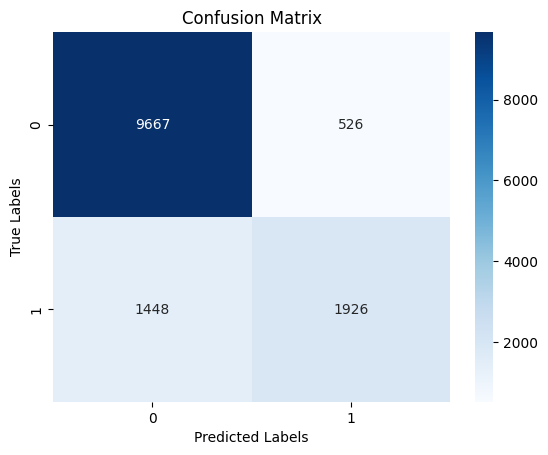

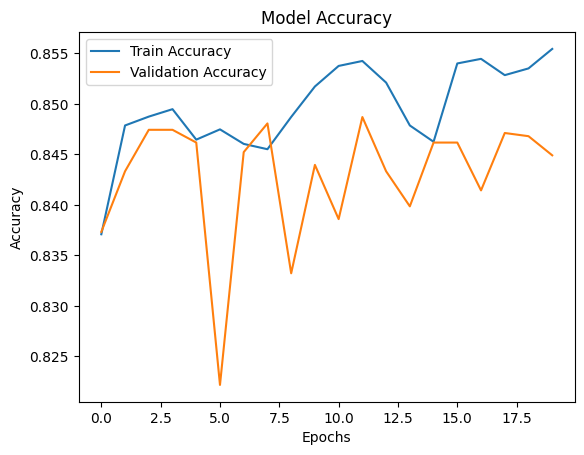

Total time taken for training and evaluation: 33.65 seconds

Trial 4: Activation Function = leaky_relu, Accuracy = 0.8545

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8213 - loss: 0.3734 - val_accuracy: 0.8418 - val_loss: 0.3271
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.3311 - val_accuracy: 0.8418 - val_loss: 0.3256
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8510 - loss: 0.3223 - val_accuracy: 0.8462 - val_loss: 0.3310
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8498 - loss: 0.3214 - val_accuracy: 0.8531 - val_loss: 0.3138
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8565 - loss: 0.3119 - val_accuracy: 0.8503 - val_loss: 0.3164
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8545 - loss: 0.3122 - val_accuracy: 0.8493 - val_loss: 0.3216
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8565 - loss: 0.3098 - val_accuracy: 

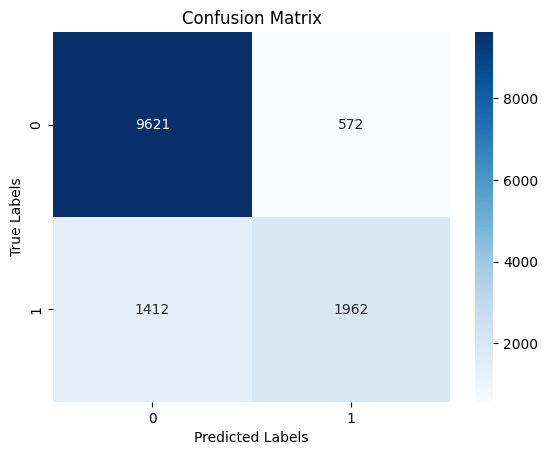

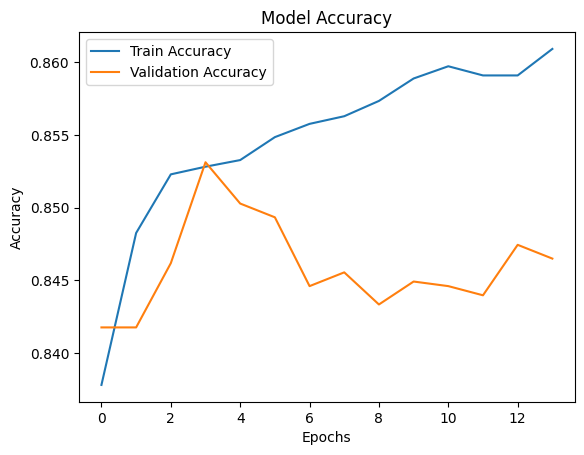

Total time taken for training and evaluation: 25.87 seconds

Trial 5: Activation Function = swish, Accuracy = 0.8538


The highest accuracy of: 0.8566 was achieved when the model was trained with relu Function



In [71]:
# List of activation functions to test
activation_functions = ['sigmoid', 'relu', 'tanh', 'leaky_relu', 'swish']

max_accuracy = 0
best_activation_function = ""

print("\n\n")

for index, func in enumerate(activation_functions):

    accuracy =  train_mlp_function(adult_data, adult_target.to_numpy(), func)

    print(f"Trial {index + 1}: Activation Function = {func}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_activation_function = func

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with {best_activation_function} Function\n")



*   Optimal Activation Function - ReLu

The highest accuracy of: 0.8566 was achieved when the model was trained with the "ReLu" activation function

Best performance metrics seem to be distributed but the combination with the highest accuracy is slighlty better

Our final optimal activation function for the Hidden Layers will be considered "ReLu" because it has got the highest accuraccy and close to the highest other metrics.

Every other trial will be conducted with this activation function and the other prior tuned parameters.


*  Data Splitting: 70-30 ; 75-25 ; 80-20

In this step the model is going to be trained using different splitting of data so the combination that gives off the best accuracy can be found.

In [82]:
# function to train the mlp with different data splitting

def train_mlp_split(dataset_features_data, dataset_target_data, split):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=split, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy





Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8185 - loss: 0.3802 - val_accuracy: 0.8399 - val_loss: 0.3247
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8503 - loss: 0.3196 - val_accuracy: 0.8509 - val_loss: 0.3250
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8504 - loss: 0.3223 - val_accuracy: 0.8500 - val_loss: 0.3167
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.3113 - val_accuracy: 0.8459 - val_loss: 0.3212
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3141 - val_accuracy: 0.8468 - val_loss: 0.3242
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8512 - loss: 0.3171 - val_accuracy: 0.8455 - val_loss: 0.3181
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.3098 - val_accuracy: 0.8478 - val_loss: 0.3151
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8523 - loss: 0.3155 - val_a

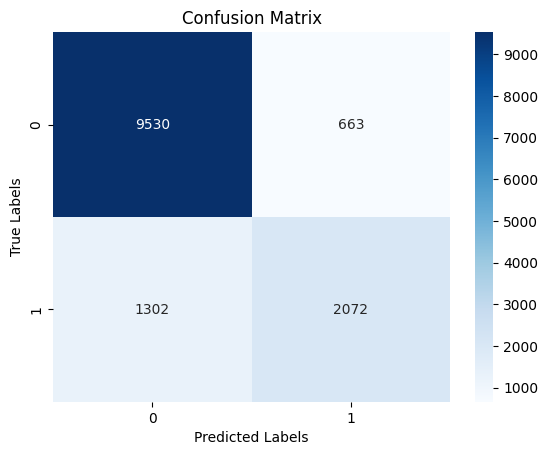

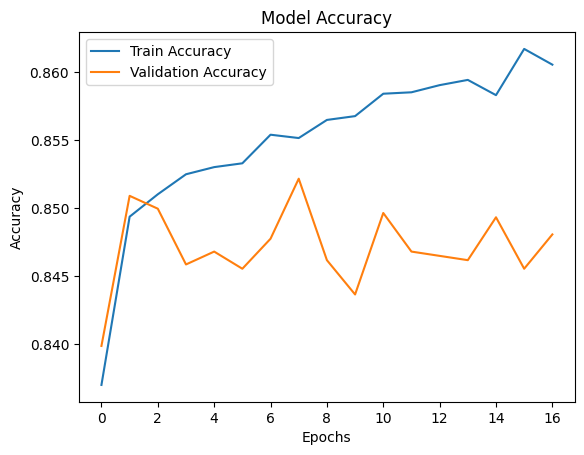

Total time taken for training and evaluation: 25.85 seconds

Trial 1: Testing Splitting Size = 0.3, Accuracy = 0.8552

Epoch 1/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8196 - loss: 0.3879 - val_accuracy: 0.8420 - val_loss: 0.3361
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8539 - loss: 0.3209 - val_accuracy: 0.8485 - val_loss: 0.3197
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8542 - loss: 0.3175 - val_accuracy: 0.8473 - val_loss: 0.3192
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8534 - loss: 0.3181 - val_accuracy: 0.8482 - val_loss: 0.3158
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.3177 - val_accuracy: 0.8494 - val_loss: 0.3157
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8559 - loss: 0.3110 - val_accuracy: 0.8491 - val_loss: 0.3166
Epoch 7/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8587 - loss: 0.3056 - val_accuracy: 0.84

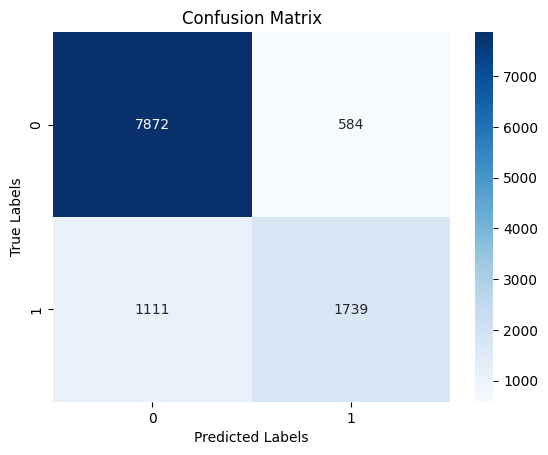

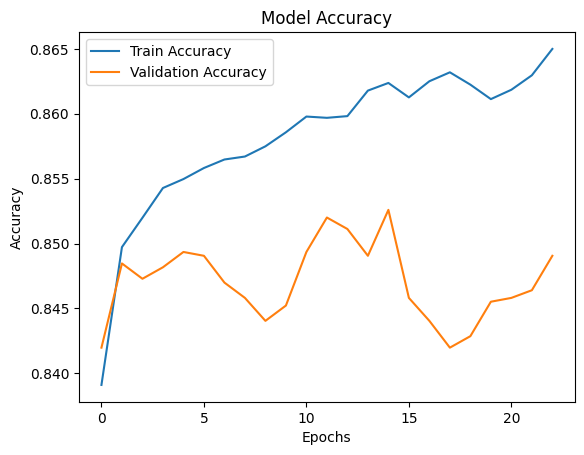

Total time taken for training and evaluation: 37.75 seconds

Trial 2: Testing Splitting Size = 0.25, Accuracy = 0.8501

Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8332 - loss: 0.3873 - val_accuracy: 0.8477 - val_loss: 0.3205
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8492 - loss: 0.3233 - val_accuracy: 0.8510 - val_loss: 0.3156
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.3216 - val_accuracy: 0.8477 - val_loss: 0.3177
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8557 - loss: 0.3106 - val_accuracy: 0.8513 - val_loss: 0.3145
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8557 - loss: 0.3134 - val_accuracy: 0.8524 - val_loss: 0.3133
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8557 - loss: 0.3087 - val_accuracy: 0.8483 - val_loss: 0.3181
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3111 - val_accuracy: 0.8

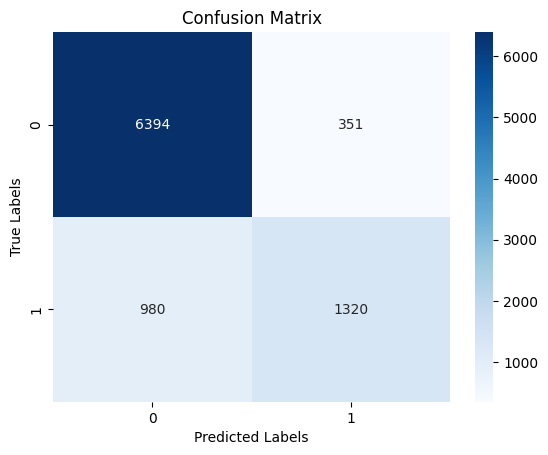

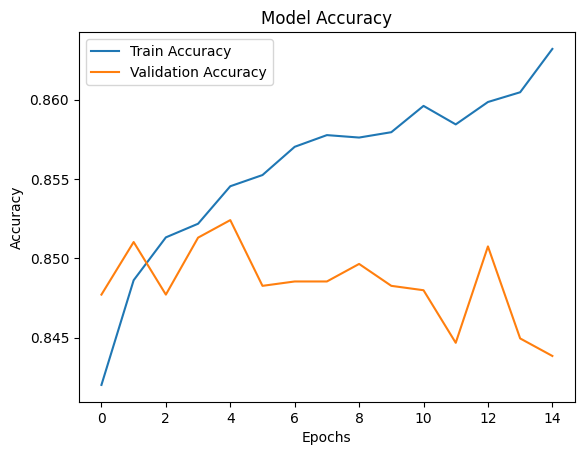

Total time taken for training and evaluation: 26.19 seconds

Trial 3: Testing Splitting Size = 0.2, Accuracy = 0.8528


The highest accuracy of: 0.8552 was achieved when the model was trained with 0.3 Testing Split



In [90]:
# List numbers for the test-size splitting
test_split = [0.3,0.25,0.2]

max_accuracy = 0
best_test_split = 0

print("\n\n")

for index, split in enumerate(test_split):

    accuracy =  train_mlp_split(adult_data, adult_target.to_numpy(), split)

    print(f"Trial {index + 1}: Testing Splitting Size = {split}, Accuracy = {accuracy:.4f}\n")

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_test_split = split

print(f"\nThe highest accuracy of: {max_accuracy:.4f} was achieved when the model was trained with {best_test_split} Testing Split\n")



*   Optimal Splitting - 70 - 30

The highest accuracy of: 0.8551 was achieved when the model was trained with a 70 - 30 splitting

Best performance metrics seem to be distributed but the combination with the highest accuracy is slighlty better

As we have seen earlier with the same splitting the model has been able to have higher accuracy

Our final optimal splitting will be considered 70 -30 because it has got the highest accuraccy and close to the highest other metrics.

Every other trial will be conducted with this splitting and the other prior tuned parameters.

After fine tuning and trying multiple combinations to find and build an Optimal MLP model, we were able to build a model that could reach higher accuracy than the base one



*   ***MLP - Final Optimal Model***

*   **Model Architecture**

Input Layer ->	Number of Features

Hidden Layer	-> 3 hidden layers

Output Layer	-> 1 Neuron - Sigmoid

Early Stopping Mechanism?	-> Yes - Active


*   **Training Parameters**

Optimizer ->	Adam

Loss Function	-> Binary Crossentropy

Number of Epochs	-> 100

Data Splitting ->	70-30

Validation Size ->	0.1

Learning Rate	 -> 0.0124

Batch Size ->	128

Activation functions ->	ReLu

Number of Neurons - Hidden Layers ->	256 - 128 - 64


## **Model Comparison**

*   Comparison and Insights on the Optimal and Base MLP Model



In [93]:
# function to train the optimized MLP Model

def train_mlp_optimized(dataset_features_data, dataset_target_data):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Create an instance of the Adam optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0124)

    # Compile the model with the customized optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy

In [92]:
# function to train the Base MLP Model

def train_mlp_base(dataset_features_data, dataset_target_data):
    start_time = time.time()  # Start timing

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_features_data, dataset_target_data, test_size=0.3, random_state=42)

    # Define the model architecture
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(100, activation="relu"),
        Dense(1, activation="sigmoid")  # Output layer for binary classification
    ])

    # Compile the model with the customized optimizer
    model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

    # Adding EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

    # Predict on the test set
    y_pred_prob = model.predict(x_test)  # Predict raw outputs in range [0, 1]
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Turn the raw outputs into binary values

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print("\n\n")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Stop timing and print the elapsed time
    end_time = time.time()
    print(f"Total time taken for training and evaluation: {end_time - start_time:.2f} seconds\n")

    return test_accuracy

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8230 - loss: 0.3856 - val_accuracy: 0.8474 - val_loss: 0.3292
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8476 - loss: 0.3277 - val_accuracy: 0.8468 - val_loss: 0.3163
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3181 - val_accuracy: 0.8509 - val_loss: 0.3149
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.3138 - val_accuracy: 0.8478 - val_loss: 0.3161
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8567 - loss: 0.3101 - val_accuracy: 0.8490 - val_loss: 0.3230
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8577 - loss: 0.3100 - val_accuracy: 0.8465 - val_loss: 0.3225
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8565 - loss: 0.3145 - val_accuracy: 0.8474 - val_loss: 0.3147
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8601 - loss: 0.3069 - val_acc

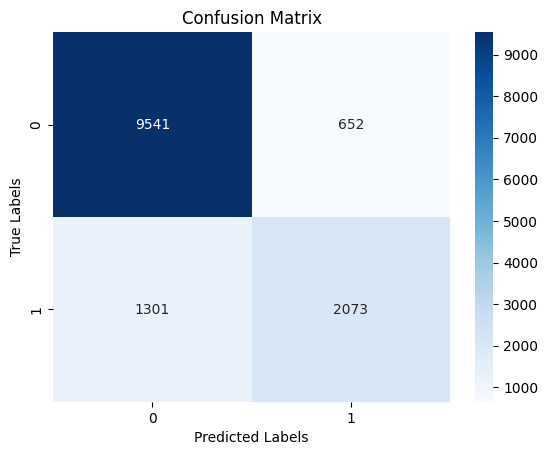

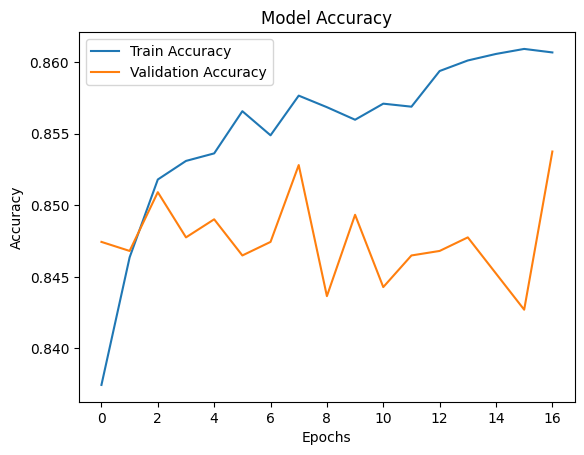

Total time taken for training and evaluation: 30.74 seconds

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8173 - loss: 0.3864 - val_accuracy: 0.8471 - val_loss: 0.3223
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8447 - loss: 0.3300 - val_accuracy: 0.8446 - val_loss: 0.3213
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8551 - loss: 0.3148 - val_accuracy: 0.8553 - val_loss: 0.3155
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8508 - loss: 0.3162 - val_accuracy: 0.8465 - val_loss: 0.3185
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8538 - loss: 0.3100 - val_accuracy: 0.8427 - val_loss: 0.3190
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.3099 - val_accuracy: 0.8449 - val_loss: 0.3177
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3065 - val_accuracy: 0.8487 - val_loss: 0.3190
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━

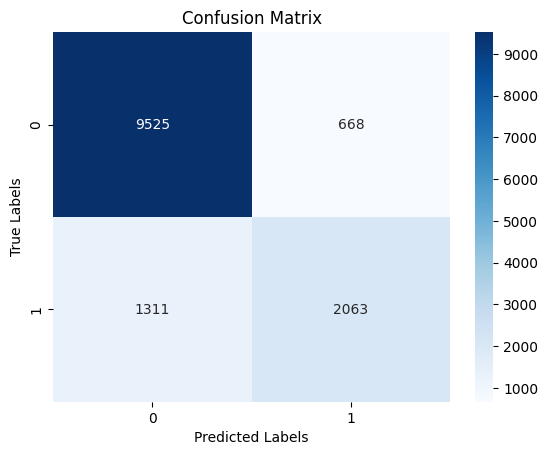

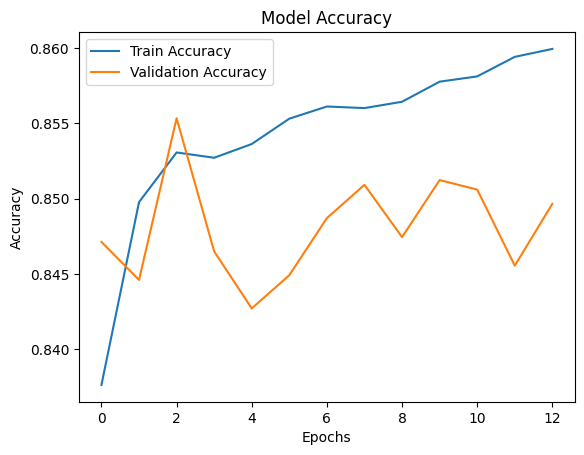

Total time taken for training and evaluation: 34.35 seconds

The optimized MLP Model has got the highest accuracy: 0.8560477629542271


In [94]:
# Code to conduct the comparison of models

optimized_mlp_accuracy = train_mlp_optimized(adult_data, adult_target.to_numpy())

base_mlp_accuracy = train_mlp_base(adult_data, adult_target.to_numpy())

if(optimized_mlp_accuracy > base_mlp_accuracy):
  print(f"The optimized MLP Model has got the highest accuracy: {optimized_mlp_accuracy}")
else:
  print(f"The base MLP Model has got the highest accuracy: {base_mlp_accuracy}")



As we can see both models are really similar in performance metrics so both of these models work really well on this dataset

The MLP - Optimal Model based on different runs has got slighlty better Accuracy and Precision but may difffer when it comes to Recall and F1 Score

## **Conclusion**

In this project, our primary aim was to construct an optimal Multi-Layer Perceptron (MLP) model capable of predicting whether an individual's income exceeds $50K per year, utilizing the Adult Census Income Dataset. This process involved a detailed exploration of demographic and socio-economic features through a systematic machine learning approach. Here’s an overview of the significant steps undertaken and the insights obtained:

1. Data Collection

We began by acquiring the Adult Census Income Dataset, which provided a foundation of demographic and economic features necessary for our predictive modeling.

2. Exploratory Data Analysis (EDA)

The EDA phase allowed us to dive deeply into the dataset, gaining essential insights into its composition and the relationships between variables. This initial exploration was crucial for guiding the data preprocessing step and modeling strategies.

3. Data Preprocessing

**Handling Null Values:** Carefully cleaned the dataset, addressing null values to ensure the integrity of our analyses and models.

**Feature Engineering:** Engineered and selected features that would likely impact the model's ability to predict income levels effectively.

**Normalization:** Normalized the data to ensure that all features contributed equally to the analysis, preventing any single feature with a larger scale from dominating the model's behavior.

**PCA Analysis:** Explored the use of Principal Component Analysis (PCA) to reduce dimensionality and tested the model's performance with and without PCA application, ultimately determining the optimal number of principal components and which dataset to use. (The one without PCA was more optimal)

4. Model Selection and Training

Over the course of the project, a total of 38 different MLP configurations were trained, experimenting with various combinations of hyperparameters. This extensive training phase was key to identifying the MLP setup that delivered the highest accuracy and best generalization capability.

5. Final Comparison

In the project's final phase, a final comparison between the base MLP model used initially for the PCA comparison and the finely tuned optimal model was conducted. This comparison not only highlighted the improvements made through our systematic tuning and optimization efforts but also validated the effectiveness of the final model configuration.

***Final Thoughts:***

This project showcases a comprehensive approach to predictive modeling, from understanding and preparing the data to optimizing and validating a powerful machine learning model. Through diligent exploration, experimentation, and refinement, an MLP model that not only meets but exceeds the baseline performance metrics was developed, equipped to provide valuable predictions and insights into income levels based on demographic and economic data. This work sets a strong foundation for informed decision-making and further research in socio-economic analytics.


